# Motivation

In [182]:
# 为什么会有针对不平衡数据的研究? 当我们的样本数据中, 正负样本的数据占比极其不均衡的时候, 模型的效果就会偏向于多数类的结果.

In [183]:
# pip install imblearn

In [184]:
# pip install --upgrade scikit-learn

In [185]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

In [186]:
seed = 623

In [187]:
# 可以替换成其他填充好的数据，要求无缺失值和极限值
data = pd.read_csv('data_clear_nonull.csv', index_col=0)
data.head()

,user,label,login_cnt_period1_x,province_x,city_x,sex_sex_x,sex_provider_x,sex_level_x,sex_verified_x,sex_regist_type_x,...,city_op2_cnt_mean,city_service1_cnt_mean,city_service1_amt_mean,city_agreement_total_mean,city_login_cnt_avg_mean,city_balance_avg_mean,city_balance2_mean,city_product1_amount_mean,city_product3_amount_mean,city_product7_cnt_mean
0,Train_00000,0.0,0.002782,17,45,0,0,1,0,1,...,0.023251,0.000873,0.000930,0.329782,0.024373,0.456977,0.394828,0.091954,0.086207,0.050836
1,Train_00001,1.0,0.006121,12,204,0,0,2,0,1,...,0.022878,0.000984,0.000758,0.316146,0.023442,0.435602,0.382383,0.064767,0.016839,0.060533
2,Train_00002,0.0,0.015597,5,331,0,0,2,0,7,...,0.023444,0.002224,0.001742,0.363854,0.020695,0.455987,0.341534,0.095847,0.102236,0.055430
3,Train_00005,0.0,0.011220,21,326,0,0,2,0,1,...,0.023927,0.003038,0.002174,0.337236,0.025890,0.474667,0.403333,0.066667,0.026667,0.056911
4,Train_00006,0.0,0.087933,13,106,0,0,2,0,7,...,0.024291,0.004410,0.006652,0.354192,0.020660,0.527459,0.434631,0.081967,0.024590,0.057943


In [188]:
for col in data.select_dtypes('object').columns:
    if col not in ['user']:
        lbl = LabelEncoder()
        data[col] = lbl.fit_transform(data[col].astype(str))

# Creating balanced training sets

In [189]:
train = data[~data['label'].isnull()]
X = train.drop(columns=['user', 'label'], axis=1)
y = train.loc[:, 'label']

print(y.value_counts())
print("-------------------------")
print(y.value_counts(normalize=True))

0.0    28791
1.0     9434
Name: label, dtype: int64
-------------------------
0.0    0.753198
1.0    0.246802
Name: label, dtype: float64


# Oversampling

In [190]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [191]:
# method 1: random over sampling
ros = RandomOverSampler(random_state=seed)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

print(y_resampled_ros.value_counts())
print("-------------------------")
print(y_resampled_ros.value_counts(normalize=True))

1.0    28791
0.0    28791
Name: label, dtype: int64
-------------------------
1.0    0.5
0.0    0.5
Name: label, dtype: float64


In [192]:
# method 2: ADASYN - 关注的是在那些基于K最近邻分类器被错误分类的原始样本附近生成新的少数类样本
X_resampled_adasyn, y_resampled_adasyn = ADASYN(random_state=seed).fit_resample(X, y)

print(y_resampled_adasyn.value_counts())
print("-------------------------")
print(y_resampled_adasyn.value_counts(normalize=True))

0.0    28791
1.0    28436
Name: label, dtype: int64
-------------------------
0.0    0.503102
1.0    0.496898
Name: label, dtype: float64


In [193]:
# method 3: SMOTE - 对于少数类样本a, 随机选择一个最近邻的样本b, 然后从a与b的连线上随机选取一个点c作为新的少数类样本;
X_resampled_smote, y_resampled_smote = SMOTE(random_state=seed).fit_resample(X, y)

print(y_resampled_smote.value_counts())
print("-------------------------")
print(y_resampled_smote.value_counts(normalize=True))

1.0    28791
0.0    28791
Name: label, dtype: int64
-------------------------
1.0    0.5
0.0    0.5
Name: label, dtype: float64


# Undersampling

In [194]:
# Method 1: Random Under Sampler
rus = RandomUnderSampler(random_state=seed)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

print(y_resampled_rus.value_counts())
print("-------------------------")
print(y_resampled_rus.value_counts(normalize=True))

1.0    9434
0.0    9434
Name: label, dtype: int64
-------------------------
1.0    0.5
0.0    0.5
Name: label, dtype: float64


In [195]:
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X, y)

print(y_resampled_nm1.value_counts())
print("-------------------------")
print(y_resampled_nm1.value_counts(normalize=True))

1.0    9434
0.0    9434
Name: label, dtype: int64
-------------------------
1.0    0.5
0.0    0.5
Name: label, dtype: float64


# Combine

In [196]:
# # 在之前的SMOTE方法中, 当由边界的样本与其他样本进行过采样差值时, 很容易生成一些噪音数据。
# 因此, 在过采样之后需要对样本进行清洗, TomekLink 与 EditedNearestNeighbours方法就能实现上述的要求
smote_tomek = SMOTETomek(random_state=seed)
X_resampled_smotetomek, y_resampled_smotetomek = smote_tomek.fit_resample(X, y)

print(y_resampled_smotetomek.value_counts())
print("-------------------------")
print(y_resampled_smotetomek.value_counts(normalize=True))

1.0    28300
0.0    28300
Name: label, dtype: int64
-------------------------
1.0    0.5
0.0    0.5
Name: label, dtype: float64


# Creating a balanced test set

In [197]:
test_X = data[data['label'].isnull()].drop(columns=['label'])
test_y = pd.read_csv('test_label_new.csv', index_col=0)
test = pd.merge(test_y, test_X, on='user')

In [198]:
X_test = test.drop(columns=['user', 'label'], axis=1)
y_test = test.loc[:, 'label']

print(y_test.value_counts())
print("-------------------------")
print(y_test.value_counts(normalize=True))

0    7211
1    2346
Name: label, dtype: int64
-------------------------
0    0.754525
1    0.245475
Name: label, dtype: float64


In [199]:
rus = RandomUnderSampler(random_state=seed)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

print(y_test_resampled.value_counts())
print("-------------------------")
print(y_test_resampled.value_counts(normalize=True))

test_resampled = pd.concat([y_test_resampled, X_test_resampled], axis=1)

1    2346
0    2346
Name: label, dtype: int64
-------------------------
1    0.5
0    0.5
Name: label, dtype: float64


In [200]:
# resampled training set
train_resampled_ros = pd.concat([y_resampled_ros, X_resampled_ros], axis=1)
train_resampled_adasyn = pd.concat([y_resampled_adasyn, X_resampled_adasyn], axis=1)
train_resampled_smote = pd.concat([y_resampled_smote, X_resampled_smote], axis=1)
train_resampled_rus = pd.concat([y_resampled_rus, X_resampled_rus], axis=1)
# train_resampled_nm1 = pd.concat([y_resampled_nm1, X_resampled_nm1], axis=1)
train_resampled_smotetomek = pd.concat([y_resampled_smotetomek, X_resampled_smotetomek], axis=1)

# resampled test set
test_resampled = pd.concat([y_test_resampled, X_test_resampled], axis=1)

In [201]:
# # save to csv
# train_resampled_ros.to_csv('train_resampled_ros.csv')
# train_resampled_adasyn.to_csv('train_resampled_adasyn.csv')
# train_resampled_smote.to_csv('train_resampled_smote.csv')

# train_resampled_rus.to_csv('train_resampled_rus.csv')
# train_resampled_nm1.to_csv('train_resampled_nm1.csv')

# train_resampled_smotetomek.to_csv('train_resampled_smotetomek.csv')

# test_resampled.to_csv('test_resampled.csv')

In [202]:
# df_test is never changed
data = pd.read_csv('data_clear.csv', index_col=0)
for col in data.select_dtypes('object').columns:
    if col not in ['user']:
        lbl = LabelEncoder()
        data[col] = lbl.fit_transform(data[col].astype(str))

df_test = data[data.label.isnull()].copy()

In [203]:
def gen_user(df):
    df_train = df
    try:
        df_train = df_train.drop(columns=['user'])
    except: 
        pass
    count = np.array(range(0,df_train.shape[0]))+1
    df0 = pd.DataFrame({'ind': count})
    df0['user'] = 'user_' + df0['ind'].astype(str)
    df_train.insert(0,'user', df0['user'])
    
    return df_train

# 在平衡样本集上训练，在非平衡样本集（真实样本）上做预测

1. Oversampling

## train_resampled_ros

In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import lightgbm as lgb
import xgboost as xgb
from hyperopt import fmin, tpe, hp, partial, Trials, space_eval, STATUS_OK
from sklearn.preprocessing import LabelEncoder
import gc

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from functools import partial
from pprint import pprint
import numpy as np
from hyperopt.pyll import scope, stochastic
from plotly import express as px
from plotly import graph_objects as go
from plotly import offline as pyo
from sklearn.metrics import make_scorer, mean_squared_error, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.utils import check_random_state

In [205]:
# 这里只要更换gen_user里面的参数就行了，不用read_csv，直接用上一步的计算结果
df_train = gen_user(train_resampled_ros)

In [206]:
ycol = 'label'
feature_names = list(filter(lambda x: x not in [ycol, 'user'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           num_leaves=25,
                           max_depth=14,
                           learning_rate=0.01,
                           n_estimators=1000,
                           subsample=0.56,
                           feature_fraction=0.59,
                           reg_alpha=10,
                           reg_lambda=13,
                           random_state=seed,
                           is_unbalance=False,
                           metric='auc')

df_oof = df_train[['user', ycol]].copy()
df_oof['prob'] = 0
prediction1 = df_test[['user']]
prediction1['prob'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(
        fold_id + 1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof.loc[val_idx, 'prob'] = pred_val

    pred_test = lgb_model.predict_proba(df_test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction1['prob'] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()

<ipython-input-206-ee95615276a6>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_1 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.751713	valid's auc: 0.731014
[200]	train's auc: 0.768941	valid's auc: 0.744606
[300]	train's auc: 0.783349	valid's auc: 0.755139
[400]	train's auc: 0.796229	valid's auc: 0.76382
[500]	train's auc: 0.807758	valid's auc: 0.770887
[600]	train's auc: 0.817959	valid's auc: 0.776942
[700]	train's auc: 0.827674	valid's auc: 0.7826
[800]	train's auc: 0.836797	valid's auc: 0.787917
[900]	train's auc: 0.845079	valid's auc: 0.792561
[1000]	train's auc: 0.852796	valid's auc: 0.797085
Did not meet early stopping. Best iteration is:
[1000]	train's auc: 0.852796	valid's auc: 0.797085


<ipython-input-206-ee95615276a6>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_2 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.752979	valid's auc: 0.740836
[200]	train's auc: 0.768852	valid's auc: 0.751468
[300]	train's auc: 0.783303	valid's auc: 0.761242
[400]	train's auc: 0.796165	valid's auc: 0.769472
[500]	train's auc: 0.807212	valid's auc: 0.776196
[600]	train's auc: 0.817679	valid's auc: 0.782391
[700]	train's auc: 0.827412	valid's auc: 0.788559
[800]	train's auc: 0.836092	valid's auc: 0.793997
[900]	train's auc: 0.844363	valid's auc: 0.798864
[1000]	train's auc: 0.852297	valid's auc: 0.803487
Did not meet early stopping. Best iteration is:
[1000]	train's auc: 0.852297	valid's auc: 0.803487


<ipython-input-206-ee95615276a6>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_3 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.752356	valid's auc: 0.738781
[200]	train's auc: 0.768949	valid's auc: 0.751806
[300]	train's auc: 0.7834	valid's auc: 0.761864
[400]	train's auc: 0.79626	valid's auc: 0.77062
[500]	train's auc: 0.807796	valid's auc: 0.777448
[600]	train's auc: 0.818335	valid's auc: 0.783178
[700]	train's auc: 0.828113	valid's auc: 0.788677
[800]	train's auc: 0.837014	valid's auc: 0.793445
[900]	train's auc: 0.84525	valid's auc: 0.798003
[1000]	train's auc: 0.853026	valid's auc: 0.802309
Did not meet early stopping. Best iteration is:
[1000]	train's auc: 0.853026	valid's auc: 0.802309


<ipython-input-206-ee95615276a6>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_4 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.752573	valid's auc: 0.731819
[200]	train's auc: 0.769287	valid's auc: 0.745428
[300]	train's auc: 0.783235	valid's auc: 0.756074
[400]	train's auc: 0.795477	valid's auc: 0.764728
[500]	train's auc: 0.806442	valid's auc: 0.772258
[600]	train's auc: 0.816684	valid's auc: 0.779185
[700]	train's auc: 0.826459	valid's auc: 0.785306
[800]	train's auc: 0.835384	valid's auc: 0.79089
[900]	train's auc: 0.843814	valid's auc: 0.795876
[1000]	train's auc: 0.851436	valid's auc: 0.800432
Did not meet early stopping. Best iteration is:
[1000]	train's auc: 0.851436	valid's auc: 0.800432


<ipython-input-206-ee95615276a6>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_5 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.753507	valid's auc: 0.735688
[200]	train's auc: 0.76997	valid's auc: 0.746272
[300]	train's auc: 0.784131	valid's auc: 0.755682
[400]	train's auc: 0.796845	valid's auc: 0.76412
[500]	train's auc: 0.80804	valid's auc: 0.771284
[600]	train's auc: 0.818352	valid's auc: 0.777314
[700]	train's auc: 0.82795	valid's auc: 0.783143
[800]	train's auc: 0.836953	valid's auc: 0.788382
[900]	train's auc: 0.845278	valid's auc: 0.793248
[1000]	train's auc: 0.852846	valid's auc: 0.797698
Did not meet early stopping. Best iteration is:
[1000]	train's auc: 0.852846	valid's auc: 0.797698


<ipython-input-206-ee95615276a6>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



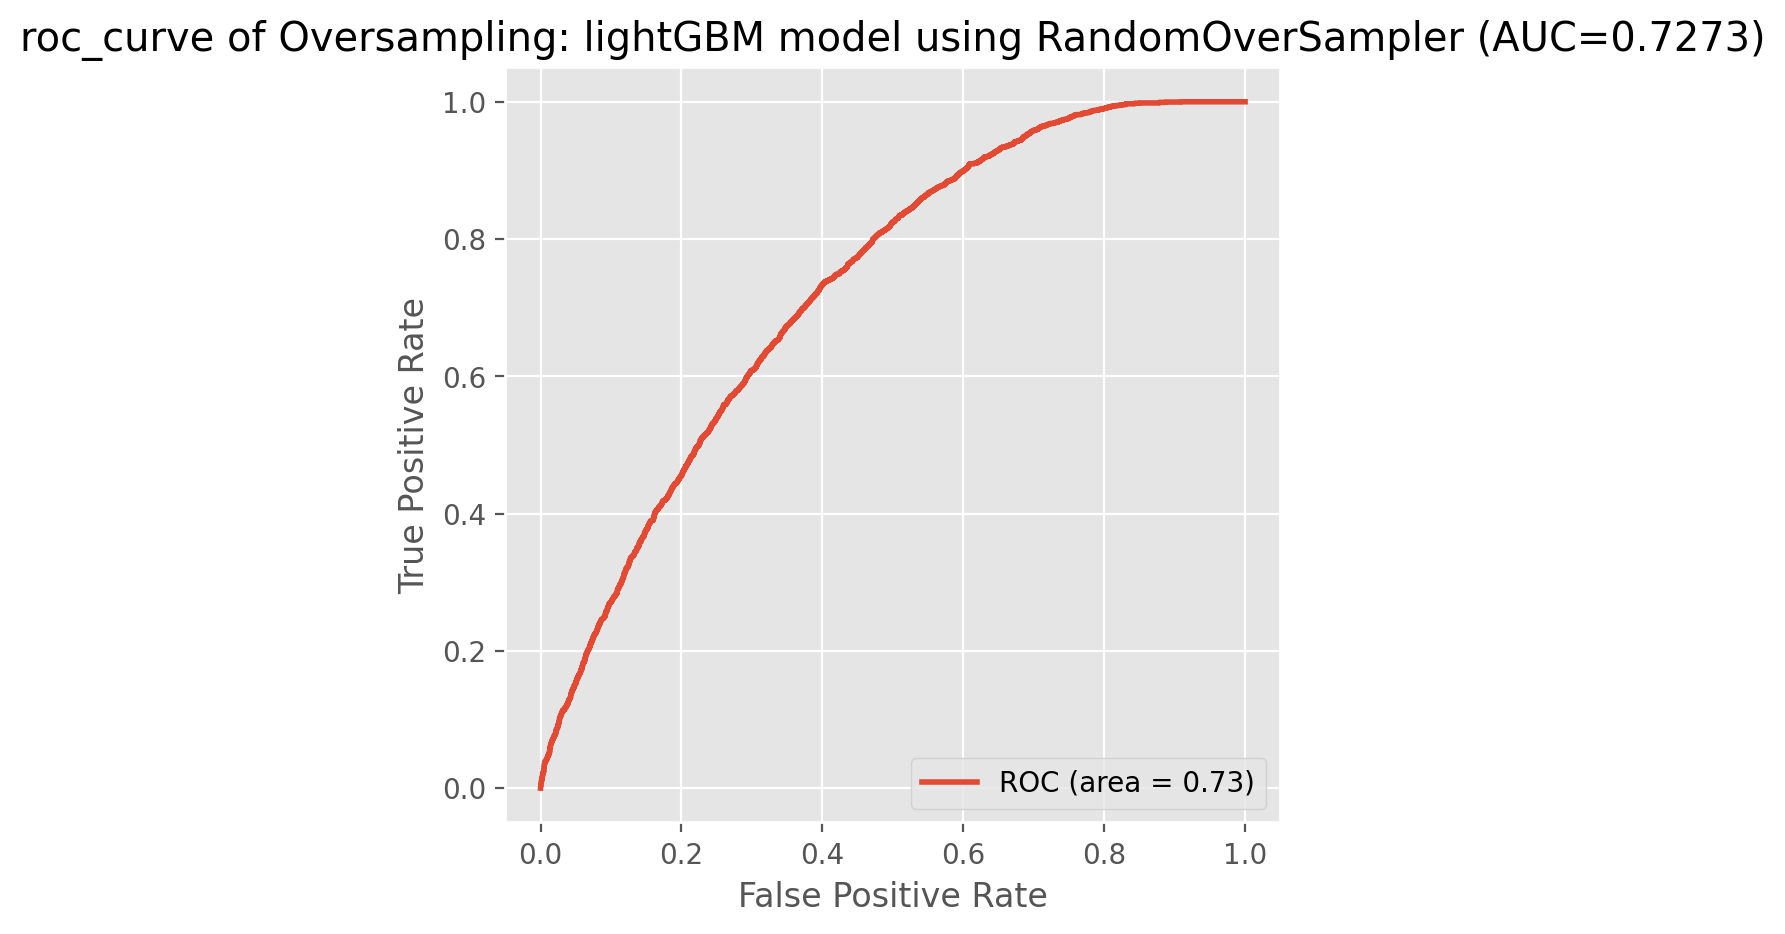

In [207]:
pred_lgb = prediction1
test_y = pd.read_csv('test_label_new.csv', index_col=0)
test = pd.merge(test_y, prediction1, on='user')

gbm_fpr,gbm_tpr,gbm_threasholds=roc_curve(test.iloc[:,1],test.iloc[:,2]) # 计算ROC的值,svm_threasholds为阈值

roc_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(5, 5))
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.title("roc_curve of %s(AUC=%.4f)" %('Oversampling: lightGBM model using RandomOverSampler ',roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(gbm_fpr,gbm_tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.legend(loc="lower right")
# plt.savefig("baseline_roc.png")

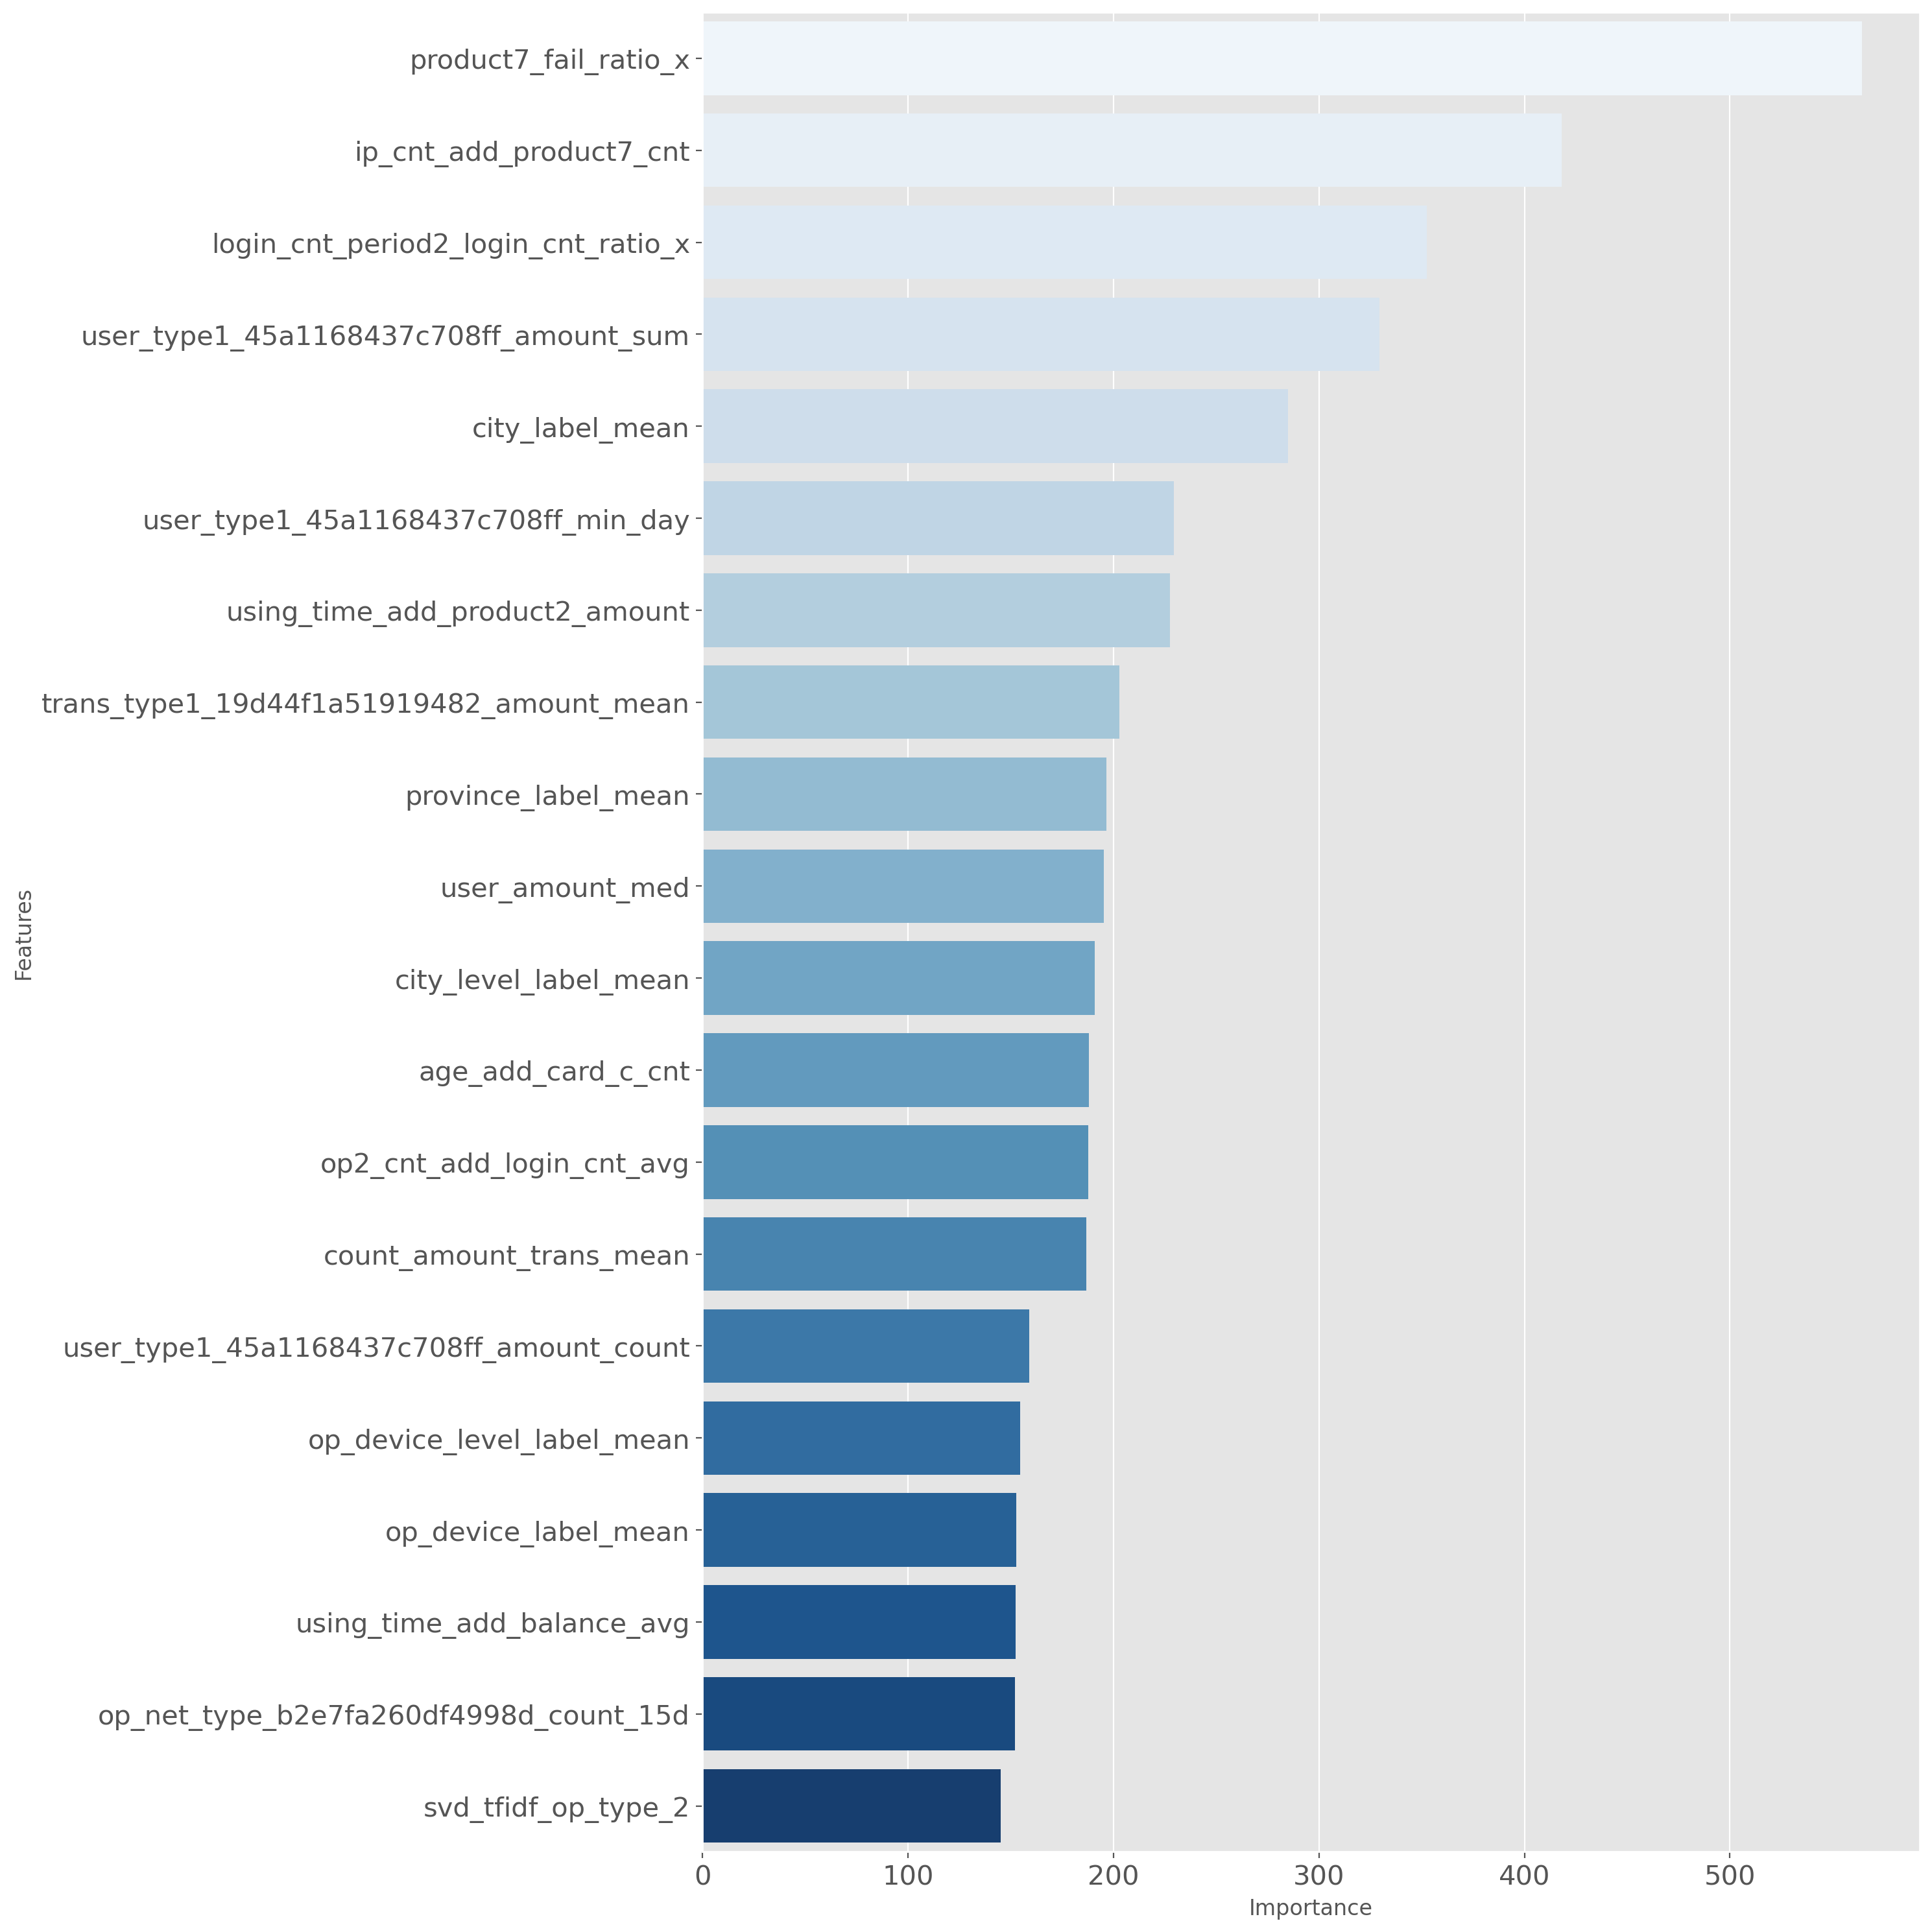

In [208]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
df_importance_top20 = df_importance.sort_values(by="importance", ascending=False).iloc[0:20,:]
plt.figure(figsize=(15, 15))
sns.barplot(x="importance", y="column", data=df_importance_top20, palette='Blues' ) 
# plt.title('LightGBM Features (avg over folds)')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.xlabel('Importance')
plt.ylabel('Features')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances.png')

其他的对于train的欠采样使用方式一样

## train_resampled_adasyn

In [209]:
df_train = gen_user(train_resampled_adasyn)

In [210]:
ycol = 'label'
feature_names = list(filter(lambda x: x not in [ycol, 'user'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           num_leaves=25,
                           max_depth=14,
                           learning_rate=0.01,
                           n_estimators=10000,
                           subsample=0.56,
                           feature_fraction=0.59,
                           reg_alpha=10,
                           reg_lambda=13,
                           random_state=seed,
                           is_unbalance=False,
                           metric='auc')

df_oof = df_train[['user', ycol]].copy()
df_oof['prob'] = 0
prediction2 = df_test[['user']]
prediction2['prob'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(
        fold_id + 1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof.loc[val_idx, 'prob'] = pred_val

    pred_test = lgb_model.predict_proba(df_test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction2['prob'] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()

<ipython-input-210-5530fe6d9a25>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_1 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.893282	valid's auc: 0.886239
[200]	train's auc: 0.905144	valid's auc: 0.895906
[300]	train's auc: 0.911803	valid's auc: 0.899876
[400]	train's auc: 0.916818	valid's auc: 0.902569
[500]	train's auc: 0.920939	valid's auc: 0.904305
[600]	train's auc: 0.924701	valid's auc: 0.905614
[700]	train's auc: 0.928028	valid's auc: 0.906624
[800]	train's auc: 0.931106	valid's auc: 0.907328
[900]	train's auc: 0.934001	valid's auc: 0.907896
[1000]	train's auc: 0.936735	valid's auc: 0.908379
[1100]	train's auc: 0.939304	valid's auc: 0.908695
[1200]	train's auc: 0.941779	valid's auc: 0.909108
[1300]	train's auc: 0.944223	valid's auc: 0.9093
[1400]	train's auc: 0.946525	valid's auc: 0.909544
[1500]	train's auc: 0.948648	valid's auc: 0.909715
[1600]	t

<ipython-input-210-5530fe6d9a25>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_2 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.892134	valid's auc: 0.887664
[200]	train's auc: 0.904151	valid's auc: 0.897339
[300]	train's auc: 0.910964	valid's auc: 0.902036
[400]	train's auc: 0.916154	valid's auc: 0.905499
[500]	train's auc: 0.920372	valid's auc: 0.90766
[600]	train's auc: 0.924047	valid's auc: 0.909216
[700]	train's auc: 0.927448	valid's auc: 0.910251
[800]	train's auc: 0.930479	valid's auc: 0.911081
[900]	train's auc: 0.933463	valid's auc: 0.911771
[1000]	train's auc: 0.936256	valid's auc: 0.912407
[1100]	train's auc: 0.938869	valid's auc: 0.912881
[1200]	train's auc: 0.941316	valid's auc: 0.913184
[1300]	train's auc: 0.943661	valid's auc: 0.913569
[1400]	train's auc: 0.945951	valid's auc: 0.913823
[1500]	train's auc: 0.948117	valid's auc: 0.91409
[1600]	t

<ipython-input-210-5530fe6d9a25>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_3 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.894404	valid's auc: 0.887176
[200]	train's auc: 0.905273	valid's auc: 0.897728
[300]	train's auc: 0.911402	valid's auc: 0.902432
[400]	train's auc: 0.91648	valid's auc: 0.905155
[500]	train's auc: 0.921032	valid's auc: 0.907109
[600]	train's auc: 0.924794	valid's auc: 0.908325
[700]	train's auc: 0.928057	valid's auc: 0.90905
[800]	train's auc: 0.931085	valid's auc: 0.909672
[900]	train's auc: 0.934073	valid's auc: 0.910187
[1000]	train's auc: 0.936841	valid's auc: 0.910563
[1100]	train's auc: 0.939543	valid's auc: 0.910808
[1200]	train's auc: 0.942114	valid's auc: 0.91105
[1300]	train's auc: 0.944506	valid's auc: 0.9112
[1400]	train's auc: 0.946796	valid's auc: 0.91136
[1500]	train's auc: 0.948957	valid's auc: 0.911453
[1600]	train

<ipython-input-210-5530fe6d9a25>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_4 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.893547	valid's auc: 0.889597
[200]	train's auc: 0.904921	valid's auc: 0.899311
[300]	train's auc: 0.910787	valid's auc: 0.90366
[400]	train's auc: 0.915698	valid's auc: 0.906451
[500]	train's auc: 0.919871	valid's auc: 0.908535
[600]	train's auc: 0.923684	valid's auc: 0.910117
[700]	train's auc: 0.927023	valid's auc: 0.911146
[800]	train's auc: 0.930164	valid's auc: 0.911944
[900]	train's auc: 0.933092	valid's auc: 0.912671
[1000]	train's auc: 0.935939	valid's auc: 0.91307
[1100]	train's auc: 0.938554	valid's auc: 0.913438
[1200]	train's auc: 0.941059	valid's auc: 0.913639
[1300]	train's auc: 0.943467	valid's auc: 0.913807
Early stopping, best iteration is:
[1287]	train's auc: 0.943174	valid's auc: 0.913838


<ipython-input-210-5530fe6d9a25>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_5 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.891921	valid's auc: 0.893167
[200]	train's auc: 0.903553	valid's auc: 0.903004
[300]	train's auc: 0.910256	valid's auc: 0.907053
[400]	train's auc: 0.915317	valid's auc: 0.909181
[500]	train's auc: 0.919607	valid's auc: 0.910703
[600]	train's auc: 0.923351	valid's auc: 0.91186
[700]	train's auc: 0.926724	valid's auc: 0.912783
[800]	train's auc: 0.929909	valid's auc: 0.913624
[900]	train's auc: 0.932856	valid's auc: 0.914241
[1000]	train's auc: 0.935736	valid's auc: 0.914749
[1100]	train's auc: 0.93846	valid's auc: 0.914995
[1200]	train's auc: 0.941127	valid's auc: 0.915273
[1300]	train's auc: 0.943591	valid's auc: 0.91546
[1400]	train's auc: 0.945982	valid's auc: 0.915578
[1500]	train's auc: 0.948291	valid's auc: 0.91572
[1600]	tra

<ipython-input-210-5530fe6d9a25>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



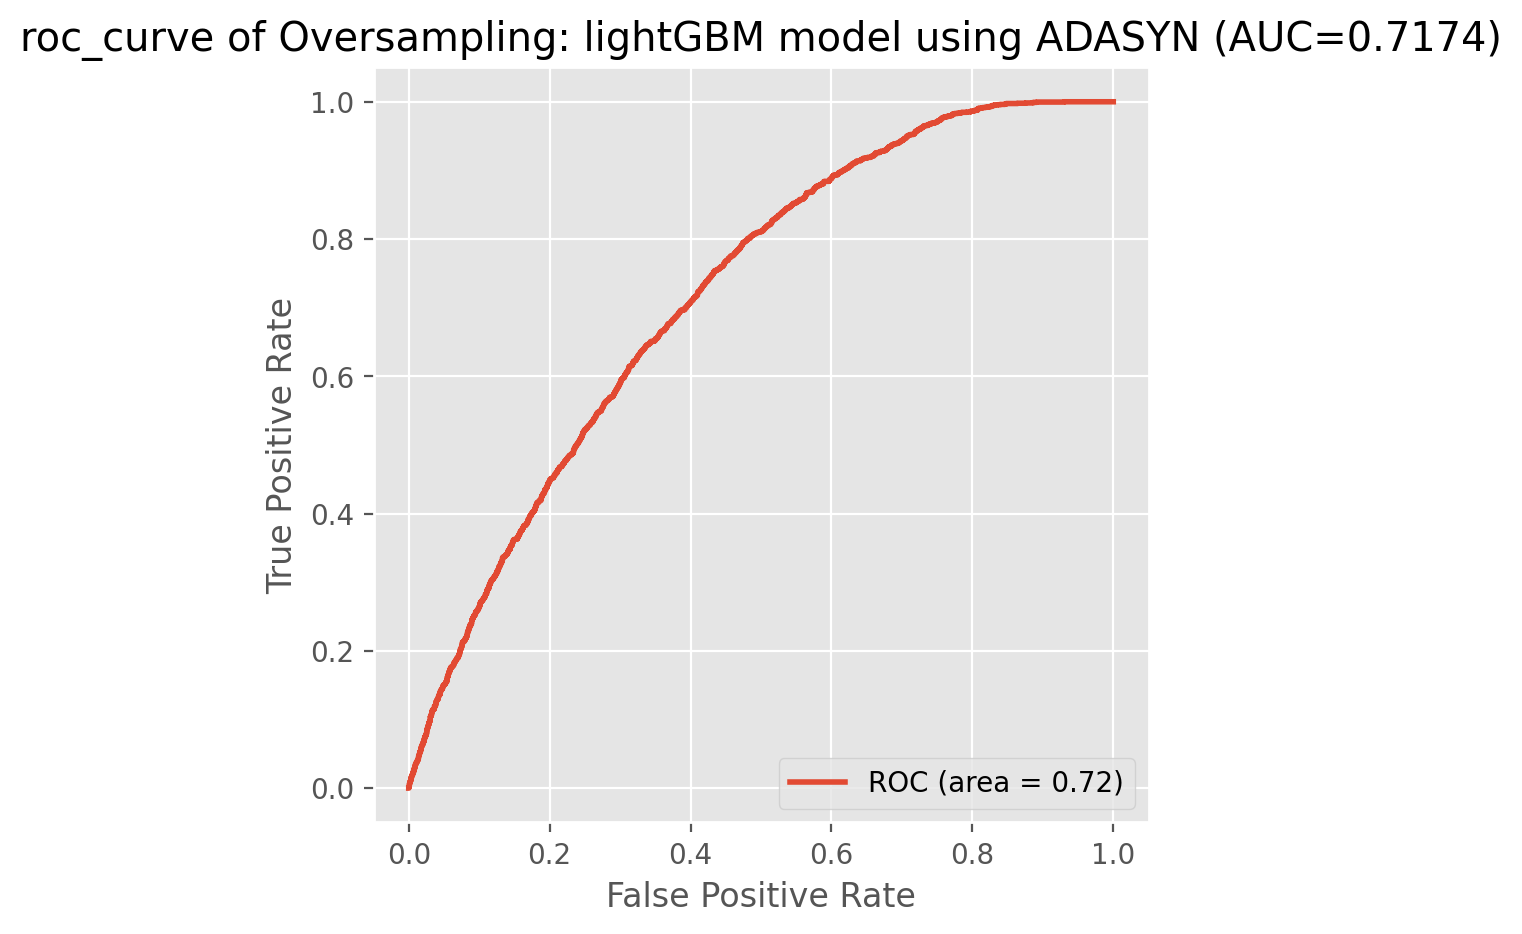

In [211]:
pred_lgb = prediction2
test_y = pd.read_csv('test_label_new.csv', index_col=0)
test = pd.merge(test_y,prediction2, on='user')

gbm_fpr,gbm_tpr,gbm_threasholds=roc_curve(test.iloc[:,1],test.iloc[:,2]) # 计算ROC的值,svm_threasholds为阈值

roc_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(5, 5))
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.title("roc_curve of %s(AUC=%.4f)" %('Oversampling: lightGBM model using ADASYN ',roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(gbm_fpr,gbm_tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.legend(loc="lower right")
# plt.savefig("baseline_roc.png")

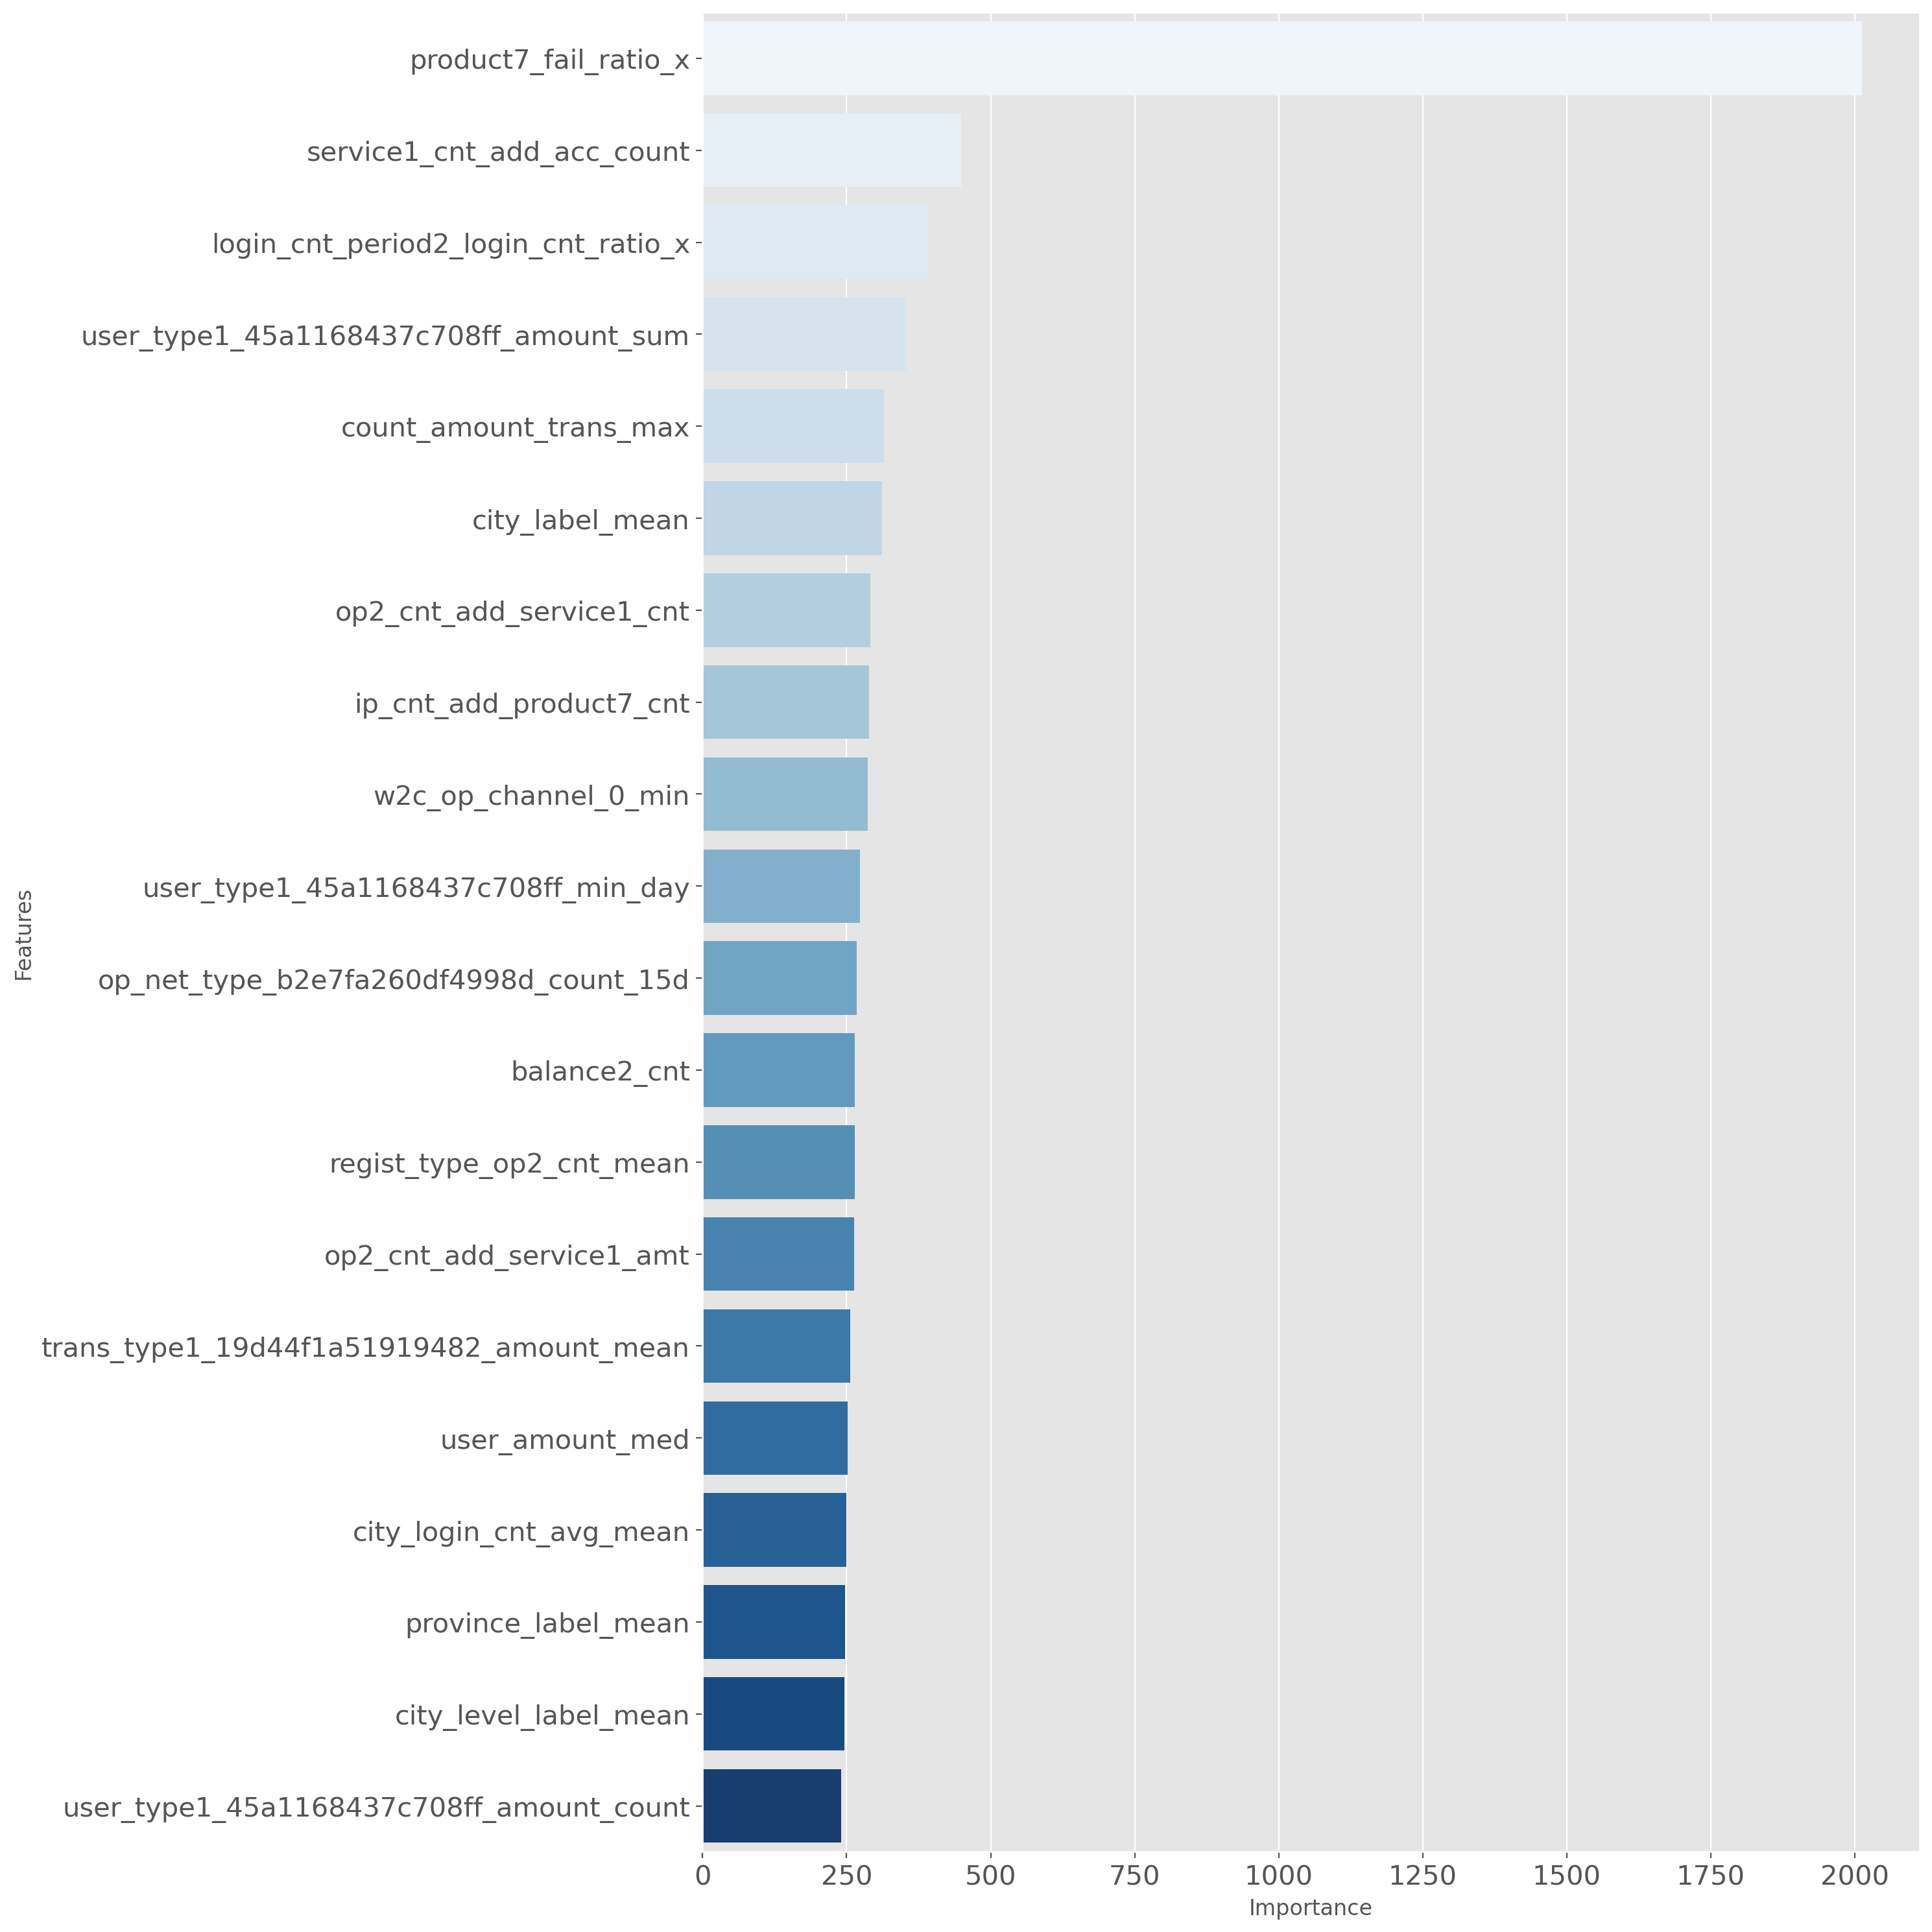

In [212]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
df_importance_top20 = df_importance.sort_values(by="importance", ascending=False).iloc[0:20,:]
plt.figure(figsize=(15, 15))
sns.barplot(x="importance", y="column", data=df_importance_top20, palette='Blues' ) 
# plt.title('LightGBM Features (avg over folds)')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.xlabel('Importance')
plt.ylabel('Features')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances.png')

## train_resampled_smote

In [213]:
df_train = gen_user(train_resampled_smote)

In [214]:
ycol = 'label'
feature_names = list(filter(lambda x: x not in [ycol, 'user'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           num_leaves=25,
                           max_depth=14,
                           learning_rate=0.01,
                           n_estimators=10000,
                           subsample=0.56,
                           feature_fraction=0.59,
                           reg_alpha=10,
                           reg_lambda=13,
                           random_state=seed,
                           is_unbalance=False,
                           metric='auc')

df_oof = df_train[['user', ycol]].copy()
df_oof['prob'] = 0
prediction3 = df_test[['user']]
prediction3['prob'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(
        fold_id + 1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof.loc[val_idx, 'prob'] = pred_val

    pred_test = lgb_model.predict_proba(df_test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction3['prob'] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()

<ipython-input-214-a03ef10e0730>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_1 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.892048	valid's auc: 0.885514
[200]	train's auc: 0.905504	valid's auc: 0.898242
[300]	train's auc: 0.912041	valid's auc: 0.903014
[400]	train's auc: 0.917237	valid's auc: 0.905636
[500]	train's auc: 0.921475	valid's auc: 0.907283
[600]	train's auc: 0.925203	valid's auc: 0.90844
[700]	train's auc: 0.92858	valid's auc: 0.909238
[800]	train's auc: 0.931622	valid's auc: 0.909973
[900]	train's auc: 0.934537	valid's auc: 0.910443
[1000]	train's auc: 0.937311	valid's auc: 0.91088
[1100]	train's auc: 0.939907	valid's auc: 0.911188
[1200]	train's auc: 0.942317	valid's auc: 0.911483
[1300]	train's auc: 0.944725	valid's auc: 0.911756
[1400]	train's auc: 0.947062	valid's auc: 0.91191
[1500]	train's auc: 0.949207	valid's auc: 0.912114
[1600]	tra

<ipython-input-214-a03ef10e0730>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_2 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.89097	valid's auc: 0.887963
[200]	train's auc: 0.904474	valid's auc: 0.900199
[300]	train's auc: 0.911049	valid's auc: 0.905104
[400]	train's auc: 0.916209	valid's auc: 0.907635
[500]	train's auc: 0.92072	valid's auc: 0.909625
[600]	train's auc: 0.924391	valid's auc: 0.910956
[700]	train's auc: 0.927727	valid's auc: 0.911971
[800]	train's auc: 0.930791	valid's auc: 0.912793
[900]	train's auc: 0.933721	valid's auc: 0.913357
[1000]	train's auc: 0.93658	valid's auc: 0.913765
[1100]	train's auc: 0.939275	valid's auc: 0.91416
[1200]	train's auc: 0.941815	valid's auc: 0.914591
[1300]	train's auc: 0.944235	valid's auc: 0.914795
[1400]	train's auc: 0.946539	valid's auc: 0.914853
[1500]	train's auc: 0.948718	valid's auc: 0.915017
[1600]	tra

<ipython-input-214-a03ef10e0730>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_3 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.891157	valid's auc: 0.891313
[200]	train's auc: 0.904366	valid's auc: 0.904174
[300]	train's auc: 0.910843	valid's auc: 0.908882
[400]	train's auc: 0.916107	valid's auc: 0.911549
[500]	train's auc: 0.920352	valid's auc: 0.913411
[600]	train's auc: 0.924129	valid's auc: 0.914686
[700]	train's auc: 0.927442	valid's auc: 0.915372
[800]	train's auc: 0.930614	valid's auc: 0.916147
[900]	train's auc: 0.933527	valid's auc: 0.916675
[1000]	train's auc: 0.936336	valid's auc: 0.917014
[1100]	train's auc: 0.938943	valid's auc: 0.917214
[1200]	train's auc: 0.94144	valid's auc: 0.917362
[1300]	train's auc: 0.943804	valid's auc: 0.917497
[1400]	train's auc: 0.946102	valid's auc: 0.917578
[1500]	train's auc: 0.94824	valid's auc: 0.917698
[1600]	t

<ipython-input-214-a03ef10e0730>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_4 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.892325	valid's auc: 0.889102
[200]	train's auc: 0.904528	valid's auc: 0.900028
[300]	train's auc: 0.910989	valid's auc: 0.904555
[400]	train's auc: 0.915966	valid's auc: 0.907508
[500]	train's auc: 0.920126	valid's auc: 0.909468
[600]	train's auc: 0.923987	valid's auc: 0.911019
[700]	train's auc: 0.927453	valid's auc: 0.912136
[800]	train's auc: 0.930551	valid's auc: 0.913033
[900]	train's auc: 0.933541	valid's auc: 0.913682
[1000]	train's auc: 0.936331	valid's auc: 0.914255
[1100]	train's auc: 0.93895	valid's auc: 0.914679
[1200]	train's auc: 0.941431	valid's auc: 0.91505
[1300]	train's auc: 0.943774	valid's auc: 0.915259
[1400]	train's auc: 0.946064	valid's auc: 0.915424
Early stopping, best iteration is:
[1436]	train's auc: 0.94

<ipython-input-214-a03ef10e0730>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_5 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.893325	valid's auc: 0.884775
[200]	train's auc: 0.906301	valid's auc: 0.894664
[300]	train's auc: 0.912561	valid's auc: 0.898831
[400]	train's auc: 0.91732	valid's auc: 0.901683
[500]	train's auc: 0.921382	valid's auc: 0.903612
[600]	train's auc: 0.924981	valid's auc: 0.905115
[700]	train's auc: 0.928344	valid's auc: 0.906298
[800]	train's auc: 0.931447	valid's auc: 0.907145
[900]	train's auc: 0.934394	valid's auc: 0.907873
[1000]	train's auc: 0.937138	valid's auc: 0.908498
[1100]	train's auc: 0.939793	valid's auc: 0.908867
[1200]	train's auc: 0.942244	valid's auc: 0.909132
[1300]	train's auc: 0.944589	valid's auc: 0.909425
[1400]	train's auc: 0.946797	valid's auc: 0.909634
[1500]	train's auc: 0.948932	valid's auc: 0.909855
[1600]	

<ipython-input-214-a03ef10e0730>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



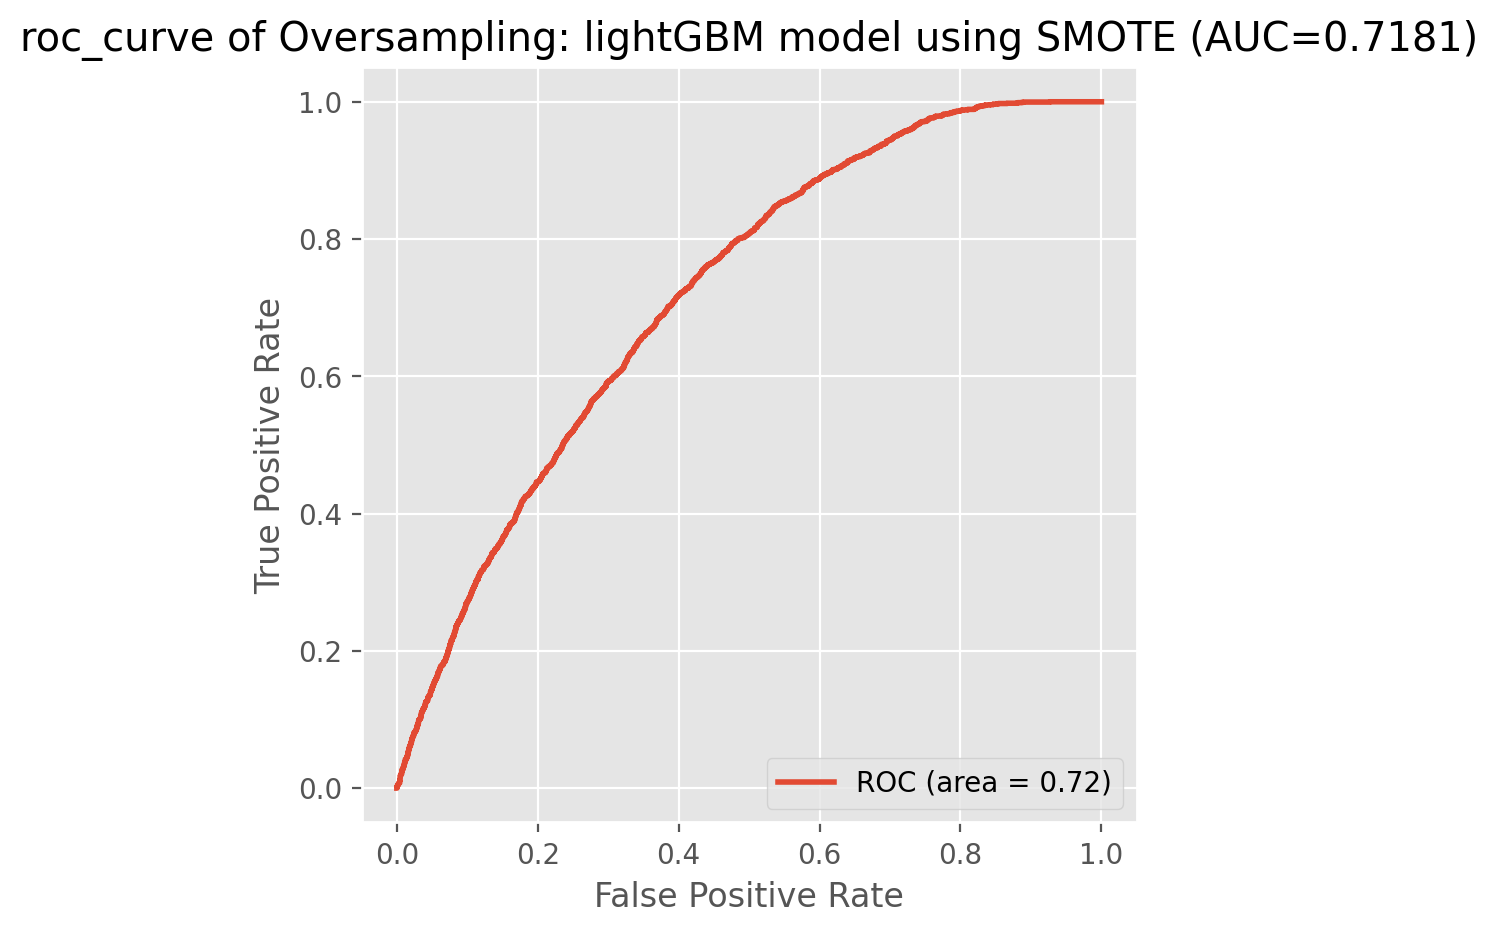

In [215]:
pred_lgb = prediction3
test_y = pd.read_csv('test_label_new.csv', index_col=0)
test = pd.merge(test_y,prediction3, on='user')

gbm_fpr,gbm_tpr,gbm_threasholds=roc_curve(test.iloc[:,1],test.iloc[:,2]) # 计算ROC的值,svm_threasholds为阈值

roc_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(5, 5))
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.title("roc_curve of %s(AUC=%.4f)" %('Oversampling: lightGBM model using SMOTE ',roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(gbm_fpr,gbm_tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.legend(loc="lower right")
# plt.savefig("baseline_roc.png")

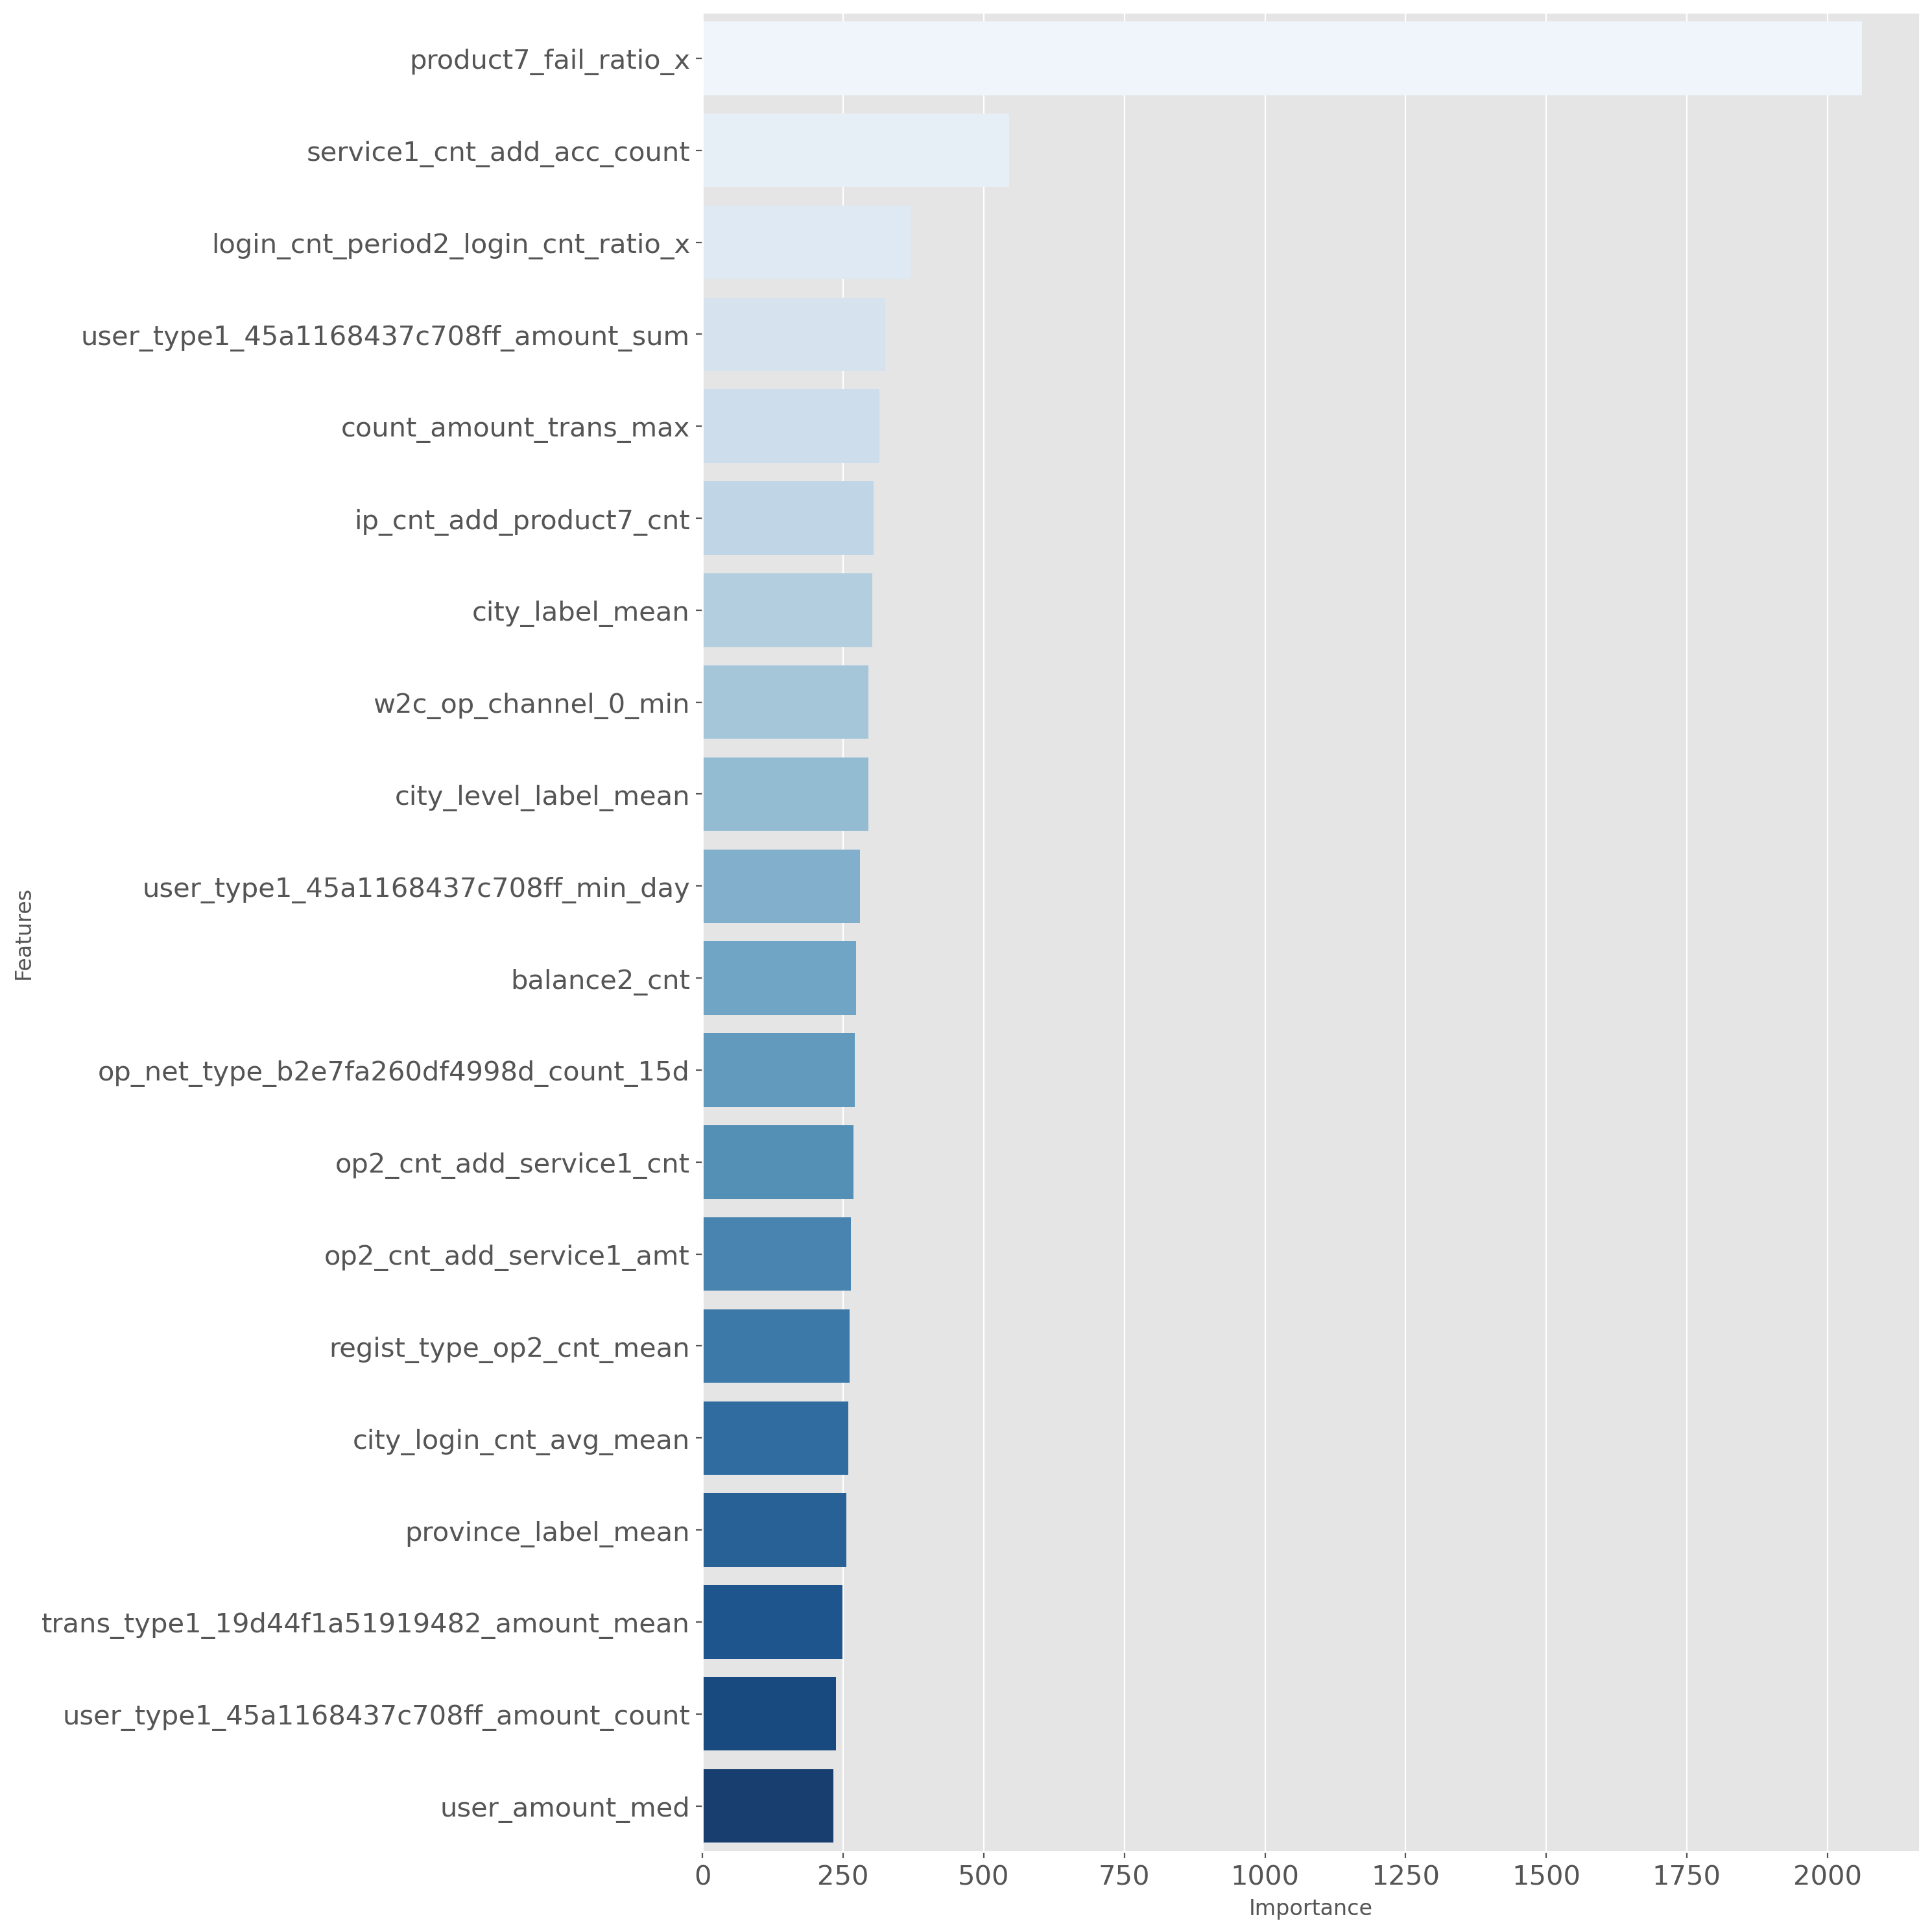

In [216]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
df_importance_top20 = df_importance.sort_values(by="importance", ascending=False).iloc[0:20,:]
plt.figure(figsize=(15, 15))
sns.barplot(x="importance", y="column", data=df_importance_top20, palette='Blues' ) 
# plt.title('LightGBM Features (avg over folds)')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.xlabel('Importance')
plt.ylabel('Features')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances.png')

2. Undersampling

## train_resampled_rus

In [217]:
df_train = gen_user(train_resampled_rus)

In [218]:
ycol = 'label'
feature_names = list(filter(lambda x: x not in [ycol, 'user'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           num_leaves=25,
                           max_depth=14,
                           learning_rate=0.01,
                           n_estimators=10000,
                           subsample=0.56,
                           feature_fraction=0.59,
                           reg_alpha=10,
                           reg_lambda=13,
                           random_state=seed,
                           is_unbalance=False,
                           metric='auc')

df_oof = df_train[['user', ycol]].copy()
df_oof['prob'] = 0
prediction4 = df_test[['user']]
prediction4['prob'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(
        fold_id + 1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof.loc[val_idx, 'prob'] = pred_val

    pred_test = lgb_model.predict_proba(df_test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction4['prob'] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()

<ipython-input-218-8105b53d5c17>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_1 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.761394	valid's auc: 0.70277
[200]	train's auc: 0.779478	valid's auc: 0.711153
[300]	train's auc: 0.795844	valid's auc: 0.716561
[400]	train's auc: 0.809711	valid's auc: 0.720623
[500]	train's auc: 0.822609	valid's auc: 0.723931
[600]	train's auc: 0.833634	valid's auc: 0.725786
[700]	train's auc: 0.844271	valid's auc: 0.727218
[800]	train's auc: 0.854262	valid's auc: 0.728531
[900]	train's auc: 0.863902	valid's auc: 0.72886
[1000]	train's auc: 0.872884	valid's auc: 0.729161
[1100]	train's auc: 0.881022	valid's auc: 0.730007
[1200]	train's auc: 0.888851	valid's auc: 0.73029
Early stopping, best iteration is:
[1215]	train's auc: 0.890031	valid's auc: 0.730467


<ipython-input-218-8105b53d5c17>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_2 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.758135	valid's auc: 0.721819
[200]	train's auc: 0.776654	valid's auc: 0.730995
[300]	train's auc: 0.794198	valid's auc: 0.736678
[400]	train's auc: 0.808393	valid's auc: 0.740832
[500]	train's auc: 0.820916	valid's auc: 0.742787
[600]	train's auc: 0.832424	valid's auc: 0.743678
[700]	train's auc: 0.843018	valid's auc: 0.744701
[800]	train's auc: 0.852724	valid's auc: 0.744948
Early stopping, best iteration is:
[818]	train's auc: 0.854394	valid's auc: 0.745099


<ipython-input-218-8105b53d5c17>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_3 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.764766	valid's auc: 0.695051
[200]	train's auc: 0.782809	valid's auc: 0.703149
[300]	train's auc: 0.799293	valid's auc: 0.70772
[400]	train's auc: 0.812707	valid's auc: 0.710529
[500]	train's auc: 0.824944	valid's auc: 0.712822
[600]	train's auc: 0.835925	valid's auc: 0.713941
[700]	train's auc: 0.846443	valid's auc: 0.714966
Early stopping, best iteration is:
[704]	train's auc: 0.84684	valid's auc: 0.715002


<ipython-input-218-8105b53d5c17>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_4 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.759239	valid's auc: 0.719566
[200]	train's auc: 0.778603	valid's auc: 0.726498
[300]	train's auc: 0.794251	valid's auc: 0.731616
[400]	train's auc: 0.808396	valid's auc: 0.73556
[500]	train's auc: 0.821318	valid's auc: 0.738979
[600]	train's auc: 0.832824	valid's auc: 0.740846
[700]	train's auc: 0.843509	valid's auc: 0.742403
[800]	train's auc: 0.853351	valid's auc: 0.74333
[900]	train's auc: 0.862543	valid's auc: 0.744303
Early stopping, best iteration is:
[903]	train's auc: 0.862844	valid's auc: 0.744314


<ipython-input-218-8105b53d5c17>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_5 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.764888	valid's auc: 0.698508
[200]	train's auc: 0.783198	valid's auc: 0.70862
[300]	train's auc: 0.797972	valid's auc: 0.714335
[400]	train's auc: 0.812144	valid's auc: 0.718793
[500]	train's auc: 0.824727	valid's auc: 0.721683
[600]	train's auc: 0.836098	valid's auc: 0.723914
[700]	train's auc: 0.846641	valid's auc: 0.724871
[800]	train's auc: 0.856504	valid's auc: 0.725774
[900]	train's auc: 0.865698	valid's auc: 0.72623
[1000]	train's auc: 0.874102	valid's auc: 0.726665
Early stopping, best iteration is:
[963]	train's auc: 0.871081	valid's auc: 0.726743


<ipython-input-218-8105b53d5c17>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



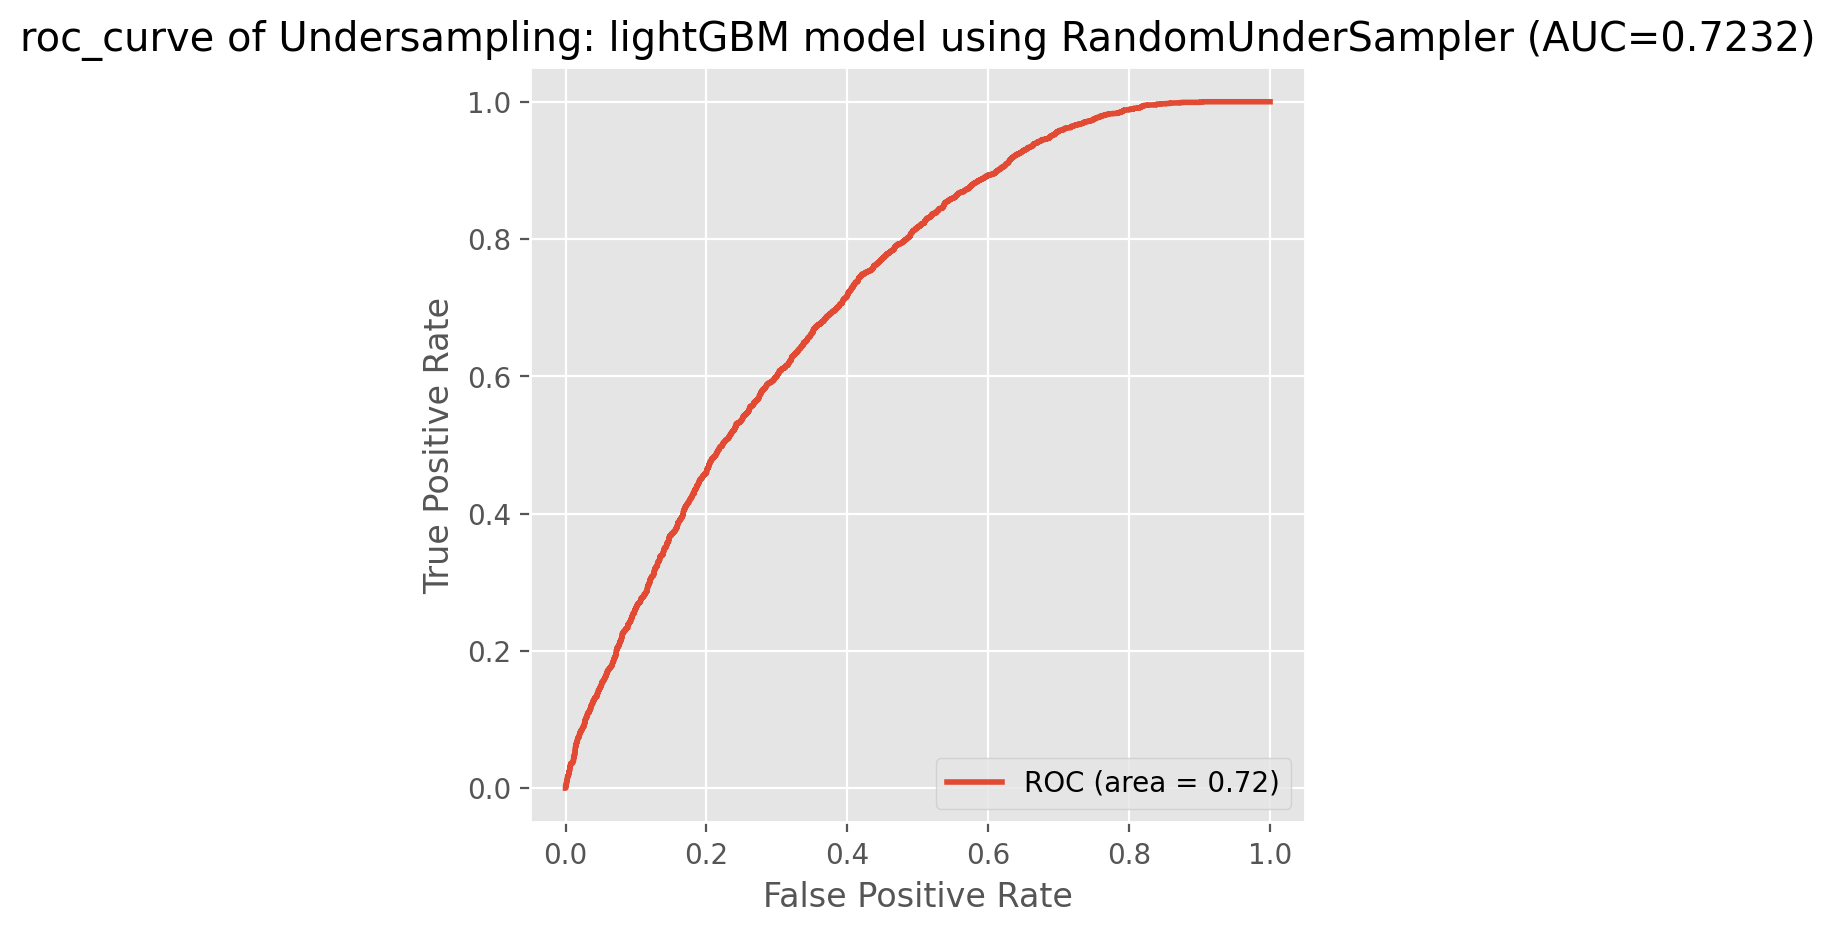

In [219]:
pred_lgb = prediction4
test_y = pd.read_csv('test_label_new.csv', index_col=0)
test = pd.merge(test_y,prediction4, on='user')

gbm_fpr,gbm_tpr,gbm_threasholds=roc_curve(test.iloc[:,1],test.iloc[:,2]) # 计算ROC的值,svm_threasholds为阈值

roc_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(5, 5))
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.title("roc_curve of %s(AUC=%.4f)" %('Undersampling: lightGBM model using RandomUnderSampler ',roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(gbm_fpr,gbm_tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.legend(loc="lower right")
# plt.savefig("baseline_roc.png")

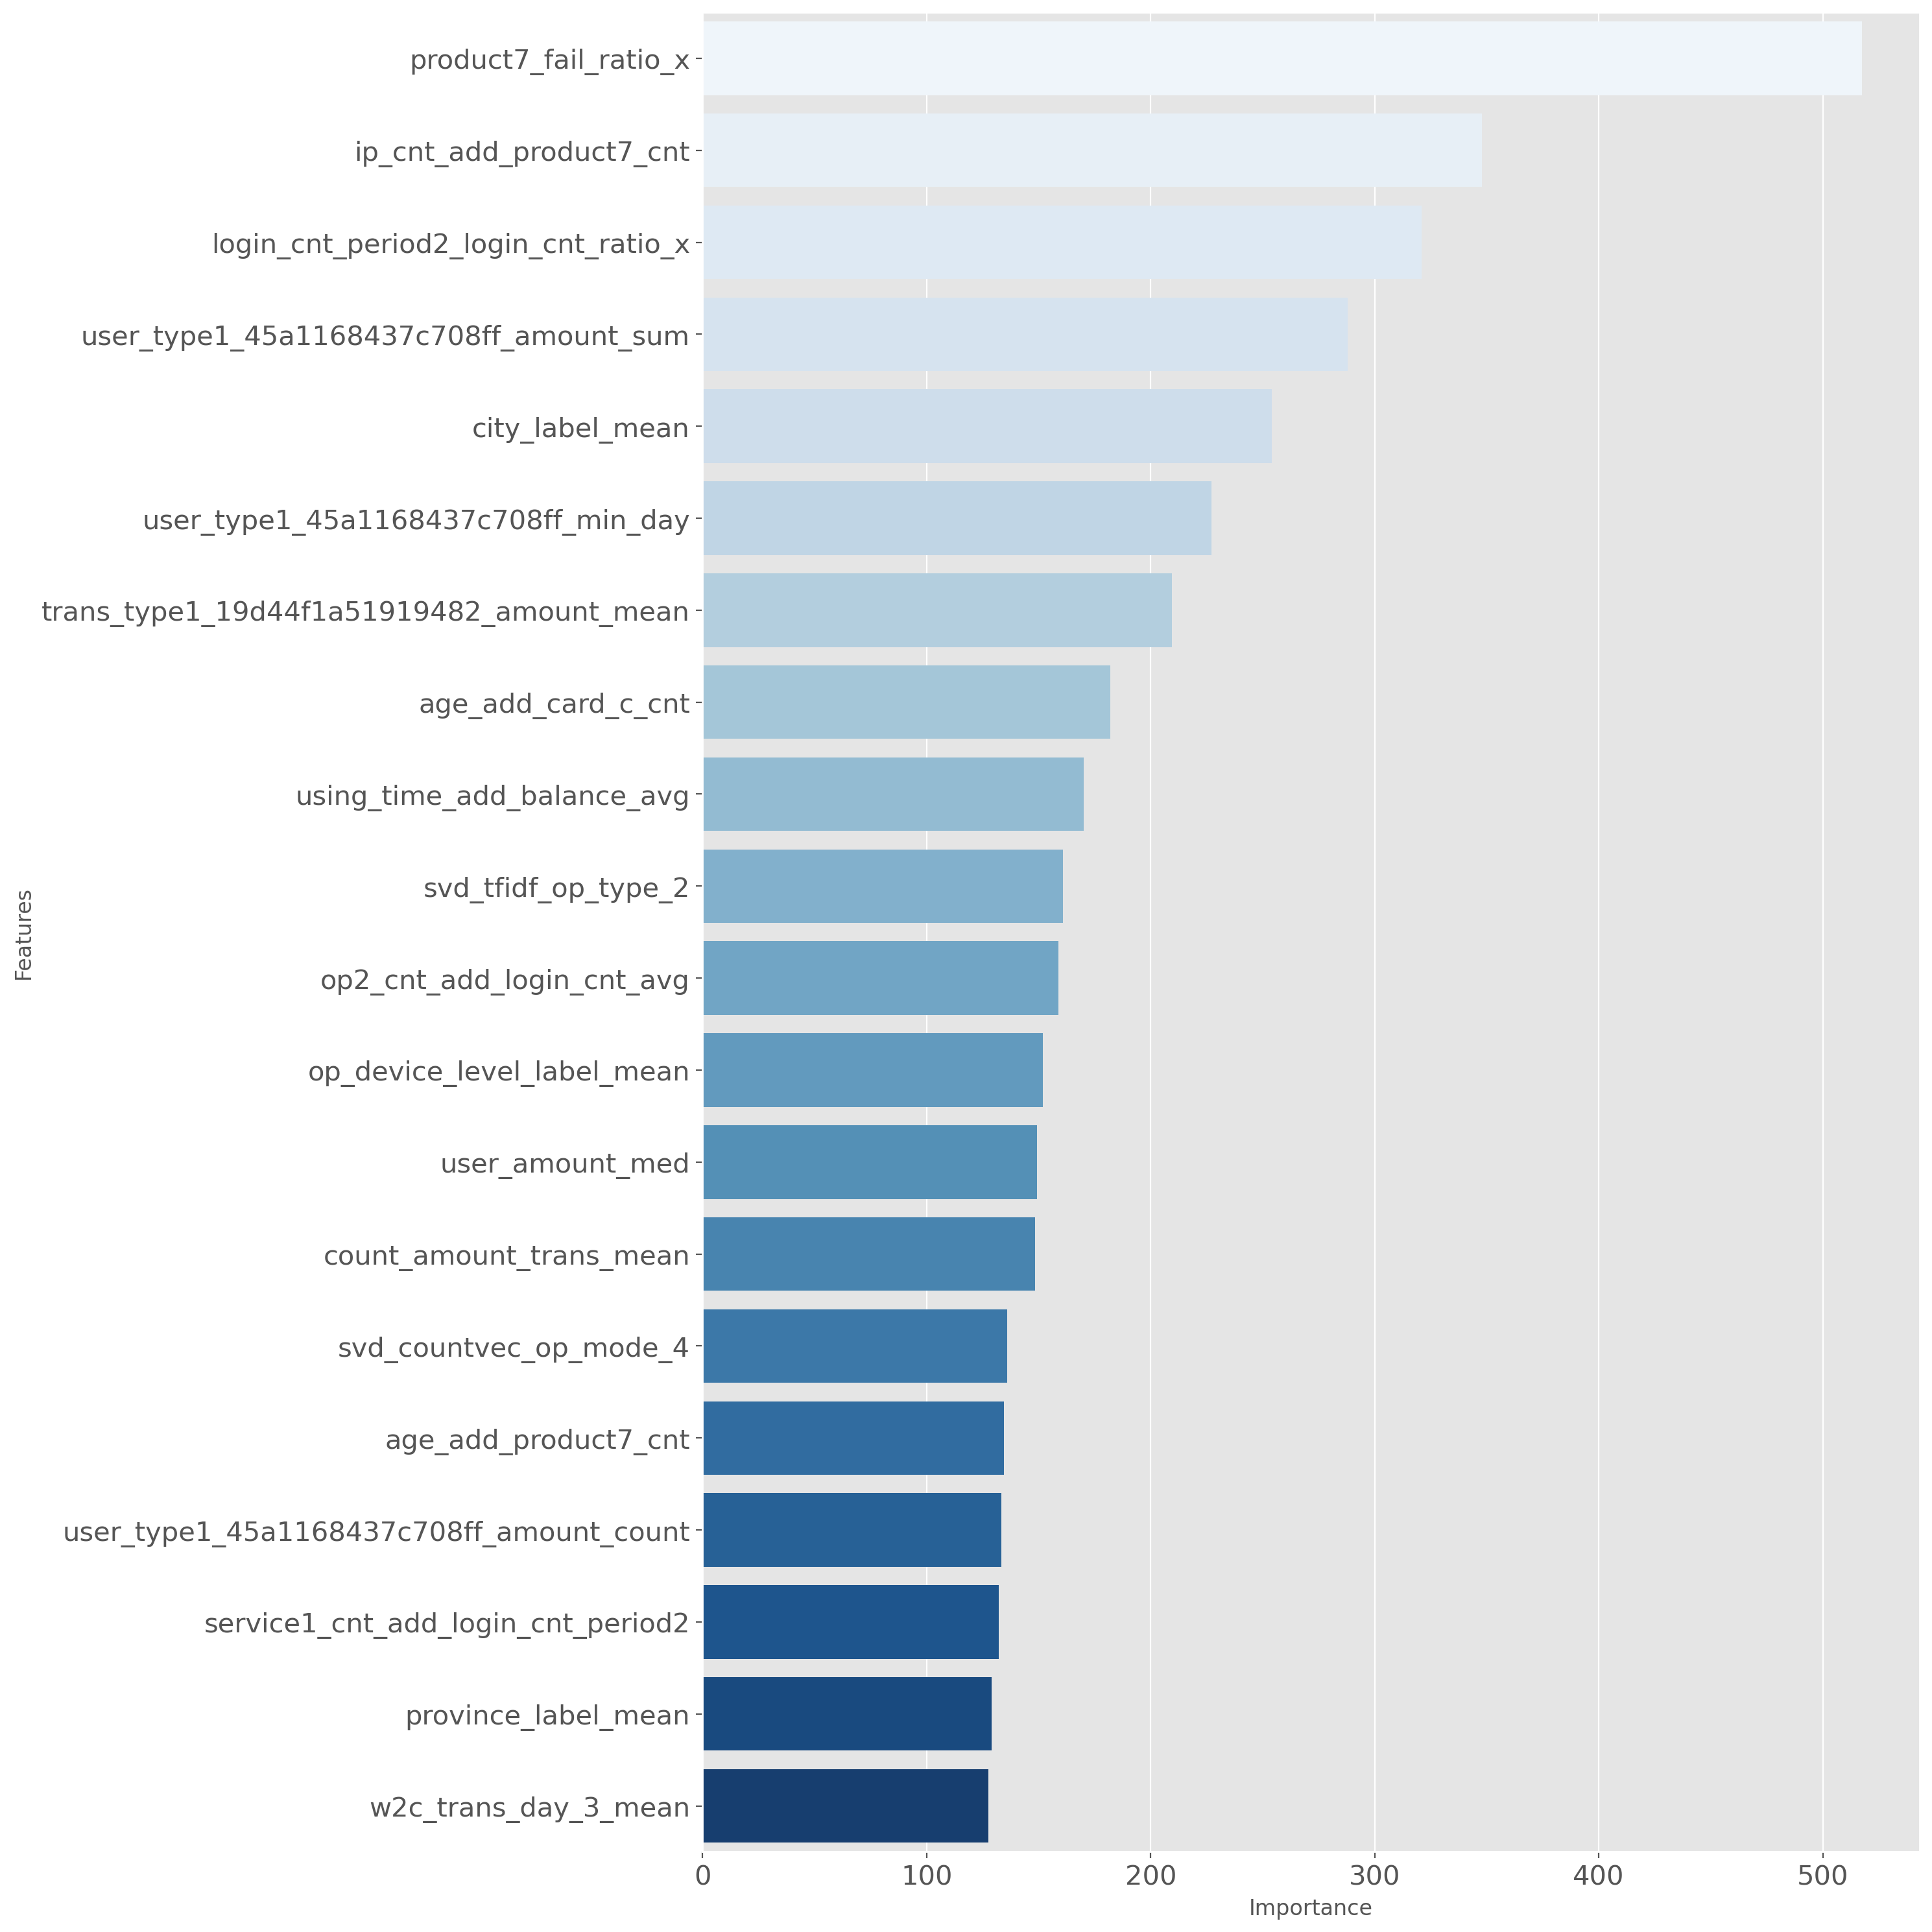

In [220]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
df_importance_top20 = df_importance.sort_values(by="importance", ascending=False).iloc[0:20,:]
plt.figure(figsize=(15, 15))
sns.barplot(x="importance", y="column", data=df_importance_top20, palette='Blues' ) 
# plt.title('LightGBM Features (avg over folds)')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.xlabel('Importance')
plt.ylabel('Features')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances.png')

## train_resampled_smotetomek

In [221]:
df_train = gen_user(train_resampled_smotetomek)

In [222]:
ycol = 'label'
feature_names = list(filter(lambda x: x not in [ycol, 'user'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           num_leaves=25,
                           max_depth=14,
                           learning_rate=0.01,
                           n_estimators=10000,
                           subsample=0.56,
                           feature_fraction=0.59,
                           reg_alpha=10,
                           reg_lambda=13,
                           random_state=seed,
                           is_unbalance=False,
                           metric='auc')

df_oof = df_train[['user', ycol]].copy()
df_oof['prob'] = 0
prediction5 = df_test[['user']]
prediction5['prob'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(
        fold_id + 1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          early_stopping_rounds=200)

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof.loc[val_idx, 'prob'] = pred_val

    pred_test = lgb_model.predict_proba(df_test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction5['prob'] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()

<ipython-input-222-a3c203ca5307>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_1 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 200 rounds
[100]	train's auc: 0.894698	valid's auc: 0.88772
[200]	train's auc: 0.908161	valid's auc: 0.899972
[300]	train's auc: 0.91444	valid's auc: 0.904866
[400]	train's auc: 0.919357	valid's auc: 0.907809
[500]	train's auc: 0.923553	valid's auc: 0.909993
[600]	train's auc: 0.927252	valid's auc: 0.911535
[700]	train's auc: 0.930581	valid's auc: 0.912606
[800]	train's auc: 0.933657	valid's auc: 0.913405
[900]	train's auc: 0.936553	valid's auc: 0.914198
[1000]	train's auc: 0.939289	valid's auc: 0.914778
[1100]	train's auc: 0.941892	valid's auc: 0.915228
[1200]	train's auc: 0.94434	valid's auc: 0.915507
[1300]	train's auc: 0.946665	valid's auc: 0.915798
[1400]	train's auc: 0.948859	valid's auc: 0.915987
[1500]	train's auc: 0.95097	valid's auc: 0.916128
[1600]	tr

<ipython-input-222-a3c203ca5307>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_2 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 200 rounds
[100]	train's auc: 0.894193	valid's auc: 0.888242
[200]	train's auc: 0.907439	valid's auc: 0.900389
[300]	train's auc: 0.914166	valid's auc: 0.905221
[400]	train's auc: 0.919321	valid's auc: 0.908473
[500]	train's auc: 0.923604	valid's auc: 0.910641
[600]	train's auc: 0.927332	valid's auc: 0.912133
[700]	train's auc: 0.930689	valid's auc: 0.91299
[800]	train's auc: 0.933871	valid's auc: 0.913756
[900]	train's auc: 0.936846	valid's auc: 0.914295
[1000]	train's auc: 0.939617	valid's auc: 0.914727
[1100]	train's auc: 0.942231	valid's auc: 0.914969
[1200]	train's auc: 0.944678	valid's auc: 0.915215
[1300]	train's auc: 0.947031	valid's auc: 0.915383
[1400]	train's auc: 0.949193	valid's auc: 0.915615
[1500]	train's auc: 0.951324	valid's auc: 0.915731
[1600]

<ipython-input-222-a3c203ca5307>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_3 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 200 rounds
[100]	train's auc: 0.894514	valid's auc: 0.892172
[200]	train's auc: 0.907733	valid's auc: 0.903108
[300]	train's auc: 0.914102	valid's auc: 0.907218
[400]	train's auc: 0.919133	valid's auc: 0.909813
[500]	train's auc: 0.92338	valid's auc: 0.911661
[600]	train's auc: 0.927094	valid's auc: 0.913026
[700]	train's auc: 0.930315	valid's auc: 0.914168
[800]	train's auc: 0.933314	valid's auc: 0.915087
[900]	train's auc: 0.936249	valid's auc: 0.915788
[1000]	train's auc: 0.938945	valid's auc: 0.916418
[1100]	train's auc: 0.941526	valid's auc: 0.916891
[1200]	train's auc: 0.943971	valid's auc: 0.917302
[1300]	train's auc: 0.946281	valid's auc: 0.917616
[1400]	train's auc: 0.948478	valid's auc: 0.917891
[1500]	train's auc: 0.950571	valid's auc: 0.918117
[1600]

<ipython-input-222-a3c203ca5307>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_4 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 200 rounds
[100]	train's auc: 0.894008	valid's auc: 0.88832
[200]	train's auc: 0.907125	valid's auc: 0.901269
[300]	train's auc: 0.913919	valid's auc: 0.906969
[400]	train's auc: 0.919075	valid's auc: 0.910012
[500]	train's auc: 0.923343	valid's auc: 0.911933
[600]	train's auc: 0.927086	valid's auc: 0.913116
[700]	train's auc: 0.930443	valid's auc: 0.91406
[800]	train's auc: 0.933425	valid's auc: 0.914605
[900]	train's auc: 0.936314	valid's auc: 0.915109
[1000]	train's auc: 0.939062	valid's auc: 0.915466
[1100]	train's auc: 0.941692	valid's auc: 0.915769
[1200]	train's auc: 0.944156	valid's auc: 0.915988
[1300]	train's auc: 0.946522	valid's auc: 0.916095
[1400]	train's auc: 0.948787	valid's auc: 0.916274
[1500]	train's auc: 0.950898	valid's auc: 0.916453
[1600]	

<ipython-input-222-a3c203ca5307>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_5 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 200 rounds
[100]	train's auc: 0.894609	valid's auc: 0.893633
[200]	train's auc: 0.907494	valid's auc: 0.90327
[300]	train's auc: 0.913958	valid's auc: 0.907186
[400]	train's auc: 0.918932	valid's auc: 0.909722
[500]	train's auc: 0.923262	valid's auc: 0.911707
[600]	train's auc: 0.927025	valid's auc: 0.913135
[700]	train's auc: 0.93028	valid's auc: 0.914018
[800]	train's auc: 0.933323	valid's auc: 0.9148
[900]	train's auc: 0.936239	valid's auc: 0.915395
[1000]	train's auc: 0.939006	valid's auc: 0.915925
[1100]	train's auc: 0.941522	valid's auc: 0.916312
[1200]	train's auc: 0.943997	valid's auc: 0.916709
[1300]	train's auc: 0.946276	valid's auc: 0.91695
[1400]	train's auc: 0.94856	valid's auc: 0.917203
[1500]	train's auc: 0.95069	valid's auc: 0.917344
[1600]	train

<ipython-input-222-a3c203ca5307>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



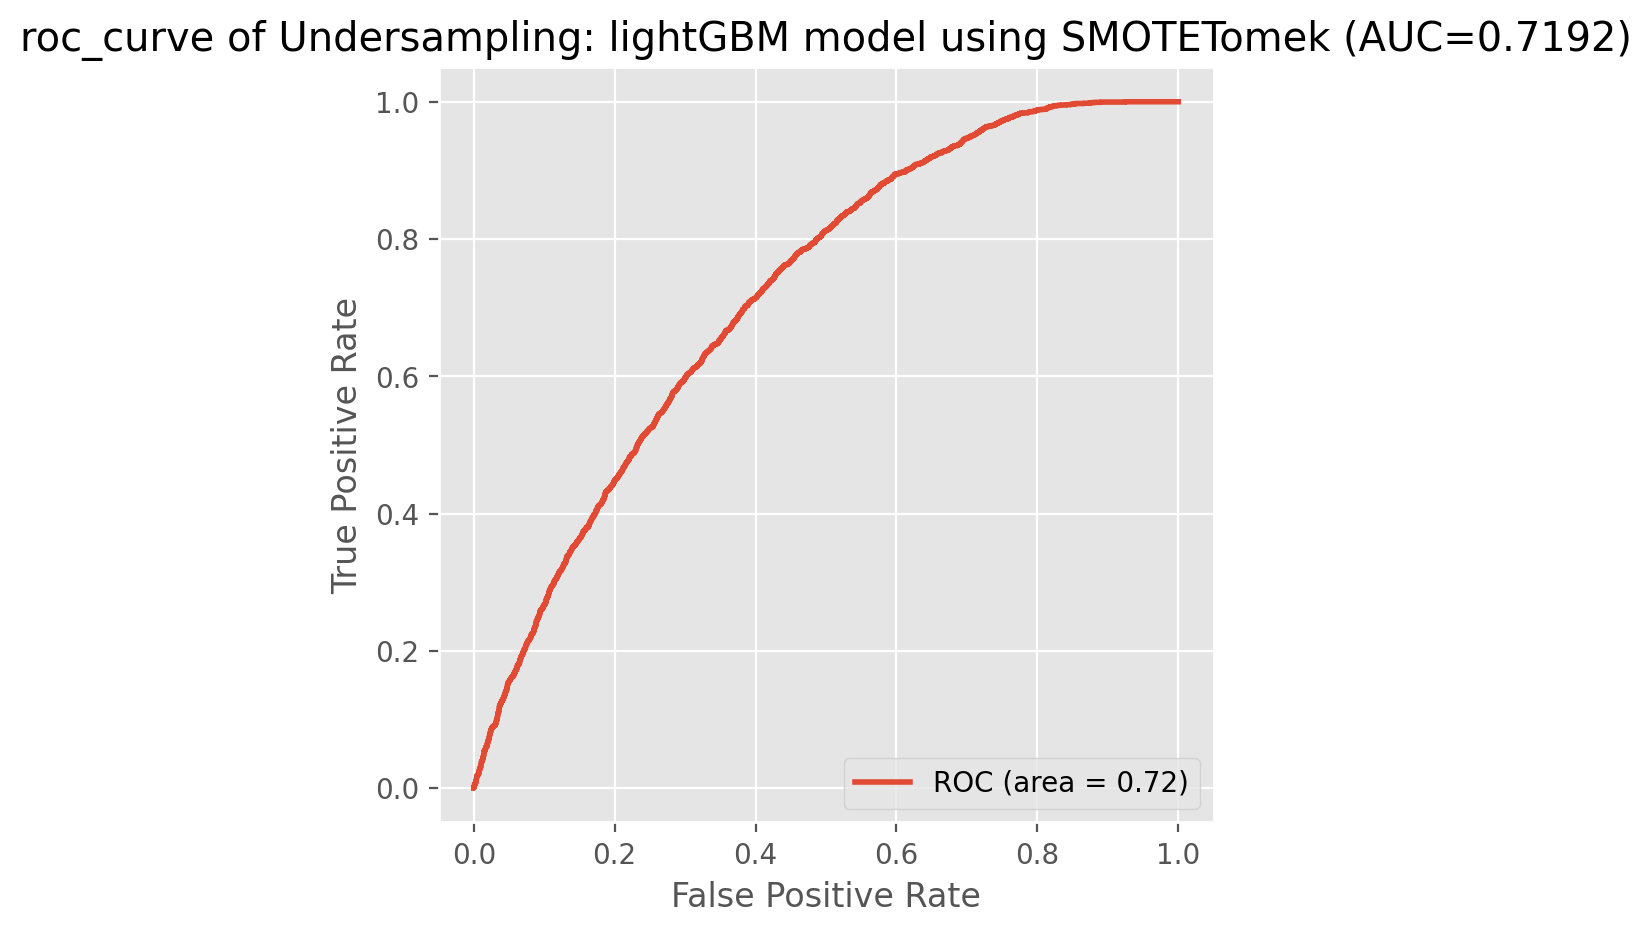

In [223]:
pred_lgb = prediction5
test_y = pd.read_csv('test_label_new.csv', index_col=0)
test = pd.merge(test_y,prediction5, on='user')

gbm_fpr,gbm_tpr,gbm_threasholds=roc_curve(test.iloc[:,1],test.iloc[:,2]) # 计算ROC的值,svm_threasholds为阈值

roc_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(5, 5))
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.title("roc_curve of %s(AUC=%.4f)" %('Undersampling: lightGBM model using SMOTETomek ',roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(gbm_fpr,gbm_tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.legend(loc="lower right")
# plt.savefig("baseline_roc.png")

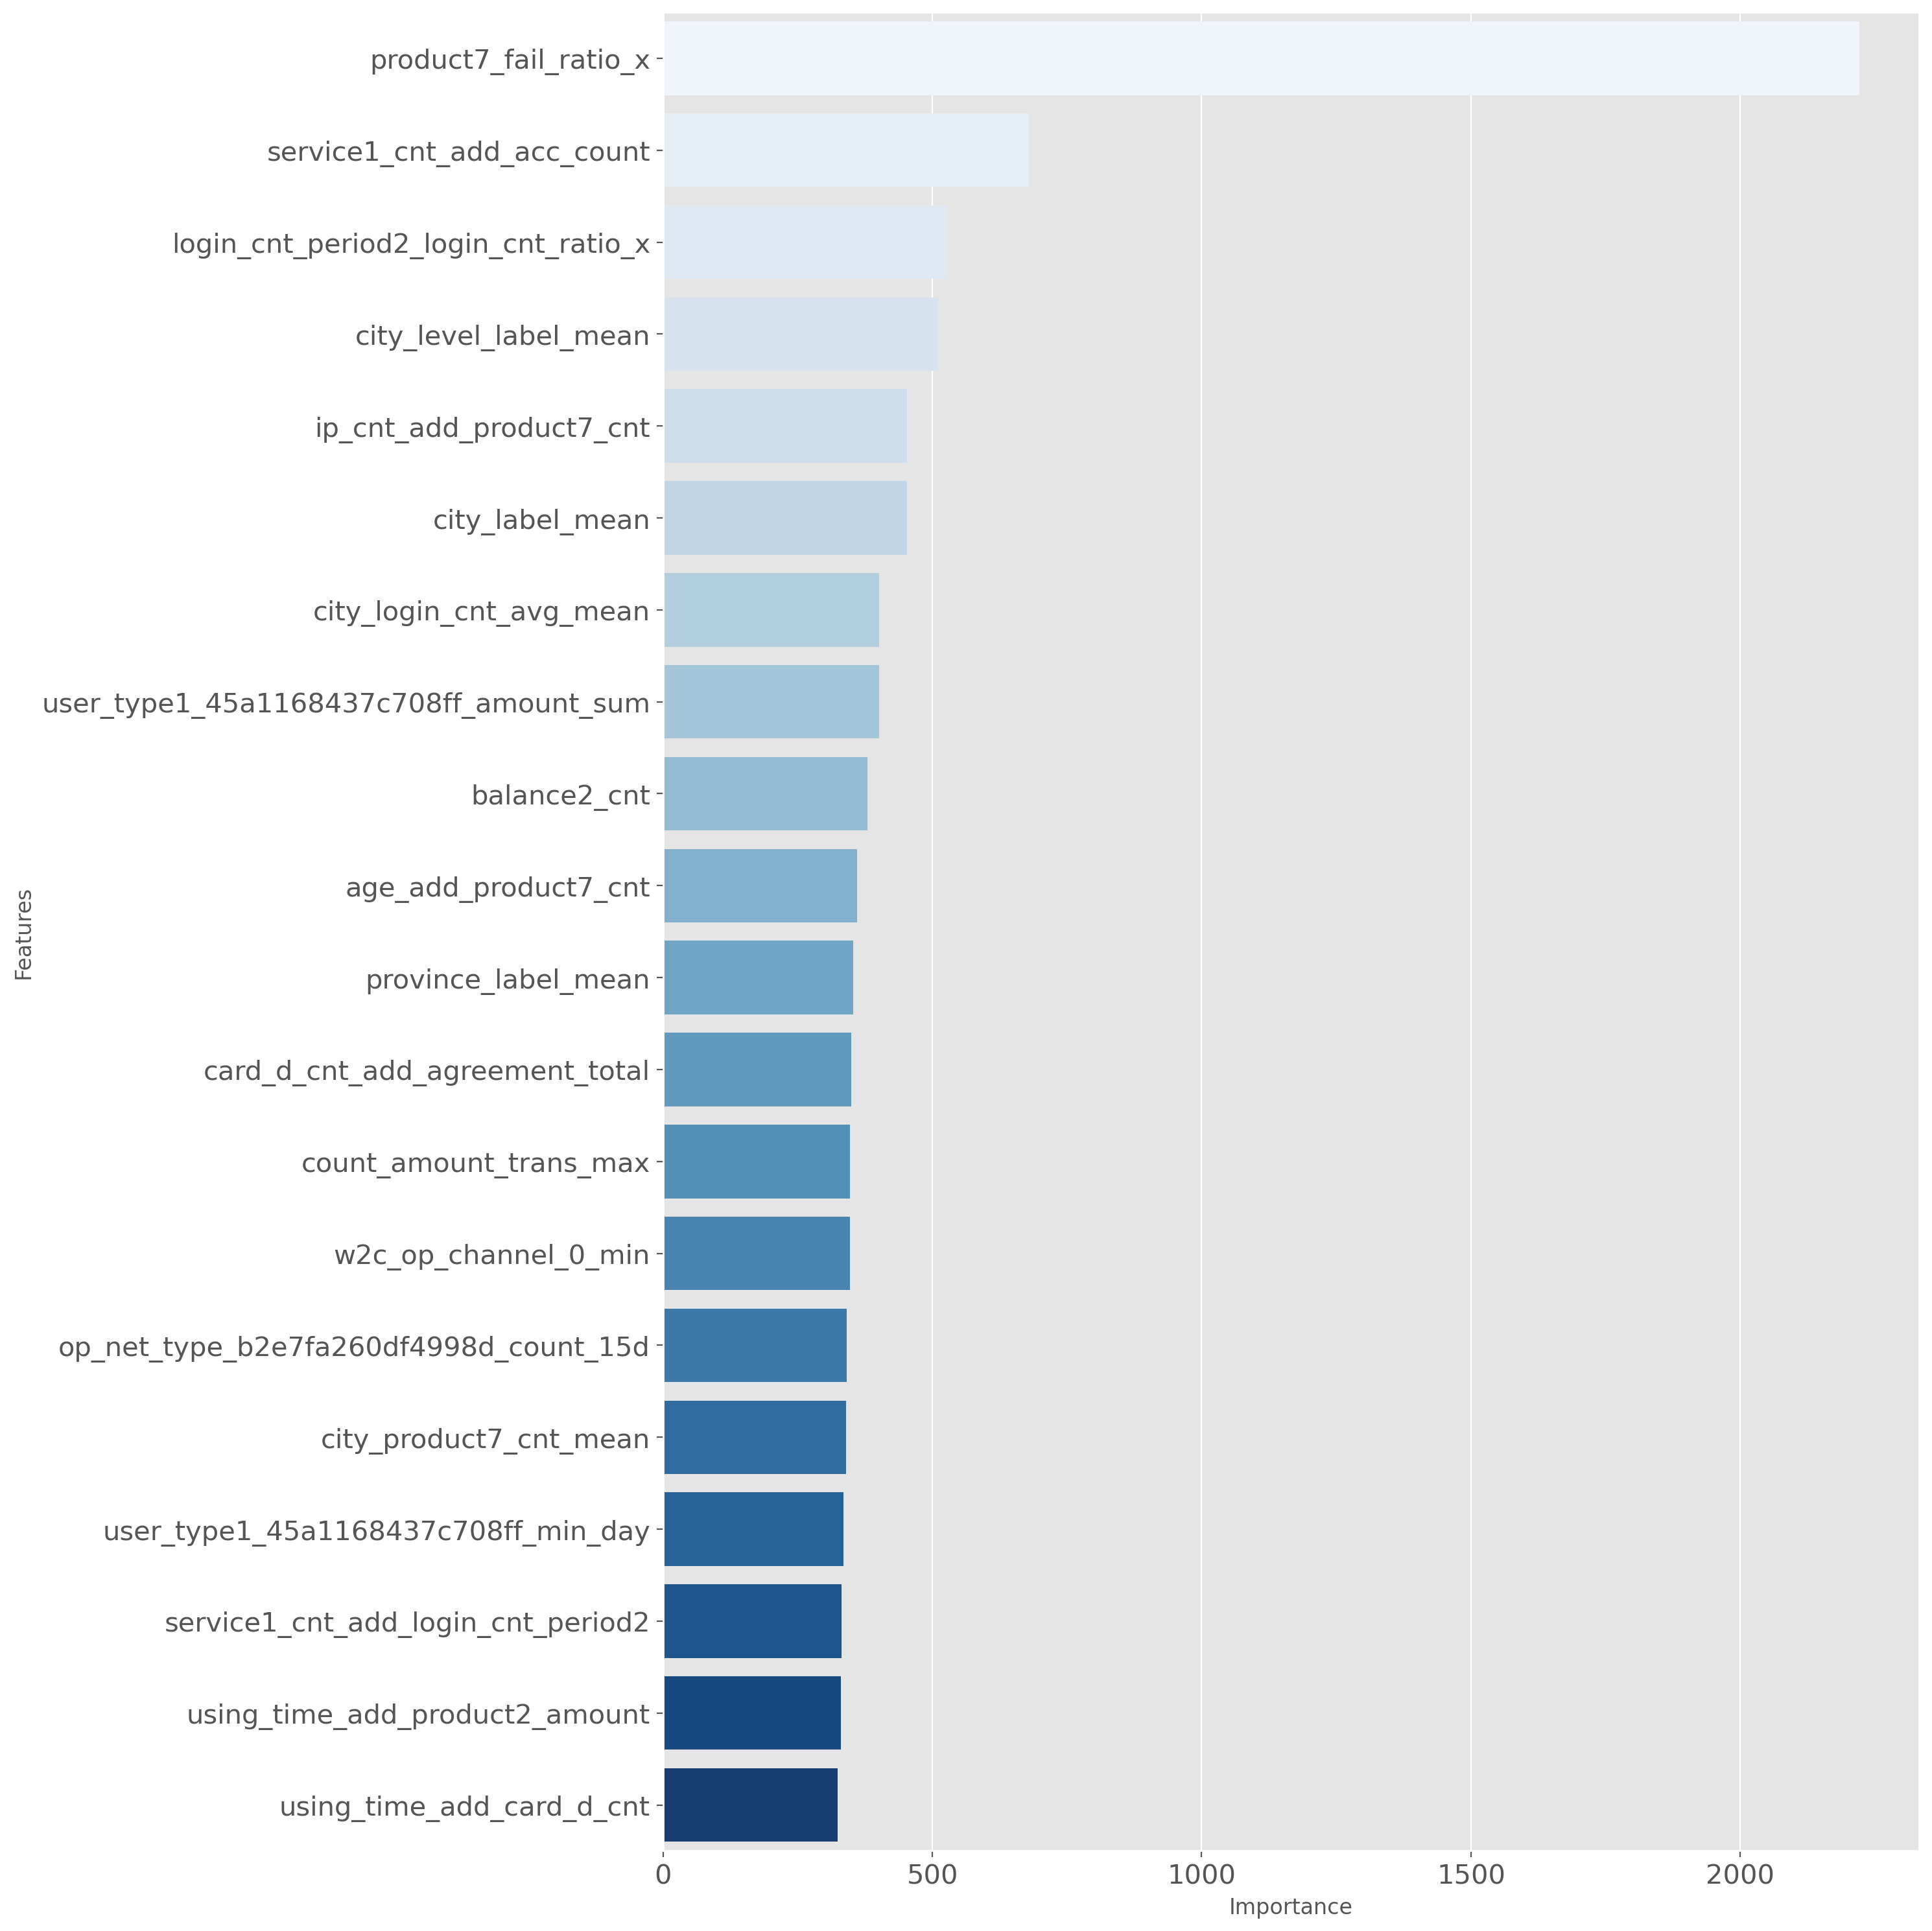

In [224]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
df_importance_top20 = df_importance.sort_values(by="importance", ascending=False).iloc[0:20,:]
plt.figure(figsize=(15, 15))
sns.barplot(x="importance", y="column", data=df_importance_top20, palette='Blues' ) 
# plt.title('LightGBM Features (avg over folds)')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.xlabel('Importance')
plt.ylabel('Features')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances.png')

# test resampled

In [225]:
# 这一步更换test set

In [226]:
df_test_0 = data[data.label.isnull()].copy()
df_test = gen_user(test_resampled)
test_y = df_test[['user', 'label']]
df_test['label'] = np.nan

### 首先使用全特征

In [237]:
# train数据集可以任意定义，这里使用全特征
train = data[~data['label'].isnull()]
df_train = train

In [238]:
ycol = 'label'
feature_names = list(filter(lambda x: x not in [ycol, 'user'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           num_leaves=25,
                           max_depth=14,
                           learning_rate=0.01,
                           n_estimators=10000,
                           subsample=0.56,
                           feature_fraction=0.59,
                           reg_alpha=10,
                           reg_lambda=13,
                           random_state=seed,
                           is_unbalance=True,
                           metric='auc')

df_oof = df_train[['user', ycol]].copy()
df_oof['prob'] = 0
prediction6 = df_test[['user']]
prediction6['prob'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(
        fold_id + 1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof.loc[val_idx, 'prob'] = pred_val

    pred_test = lgb_model.predict_proba(df_test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction6['prob'] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()

<ipython-input-238-cbbf0bc9125d>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_1 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.75138	valid's auc: 0.713858
[200]	train's auc: 0.77012	valid's auc: 0.723244
[300]	train's auc: 0.78489	valid's auc: 0.729437
[400]	train's auc: 0.798399	valid's auc: 0.734317
[500]	train's auc: 0.810856	valid's auc: 0.737244
[600]	train's auc: 0.821812	valid's auc: 0.738605
[700]	train's auc: 0.831654	valid's auc: 0.738978
[800]	train's auc: 0.840933	valid's auc: 0.739251
[900]	train's auc: 0.849904	valid's auc: 0.739634
[1000]	train's auc: 0.858283	valid's auc: 0.739846
Early stopping, best iteration is:
[997]	train's auc: 0.85801	valid's auc: 0.739867


<ipython-input-238-cbbf0bc9125d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_2 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.751938	valid's auc: 0.712819
[200]	train's auc: 0.770352	valid's auc: 0.721381
[300]	train's auc: 0.785245	valid's auc: 0.726629
[400]	train's auc: 0.798656	valid's auc: 0.730656
[500]	train's auc: 0.81066	valid's auc: 0.733211
[600]	train's auc: 0.821254	valid's auc: 0.734738
[700]	train's auc: 0.830906	valid's auc: 0.735197
[800]	train's auc: 0.840255	valid's auc: 0.735389
Early stopping, best iteration is:
[794]	train's auc: 0.839689	valid's auc: 0.735485


<ipython-input-238-cbbf0bc9125d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_3 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.751265	valid's auc: 0.717885
[200]	train's auc: 0.770816	valid's auc: 0.725568
[300]	train's auc: 0.785969	valid's auc: 0.729675
[400]	train's auc: 0.799114	valid's auc: 0.73291
[500]	train's auc: 0.810873	valid's auc: 0.73416
[600]	train's auc: 0.821782	valid's auc: 0.735054
[700]	train's auc: 0.83202	valid's auc: 0.735398
[800]	train's auc: 0.84158	valid's auc: 0.736227
[900]	train's auc: 0.850724	valid's auc: 0.73651
Early stopping, best iteration is:
[932]	train's auc: 0.853417	valid's auc: 0.736701


<ipython-input-238-cbbf0bc9125d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_4 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.751769	valid's auc: 0.722569
[200]	train's auc: 0.77017	valid's auc: 0.732468
[300]	train's auc: 0.784582	valid's auc: 0.738322
[400]	train's auc: 0.797771	valid's auc: 0.742717
[500]	train's auc: 0.809882	valid's auc: 0.745439
[600]	train's auc: 0.820622	valid's auc: 0.747097
[700]	train's auc: 0.830428	valid's auc: 0.747919
[800]	train's auc: 0.839493	valid's auc: 0.748144
[900]	train's auc: 0.848168	valid's auc: 0.748581
Early stopping, best iteration is:
[918]	train's auc: 0.849747	valid's auc: 0.748641


<ipython-input-238-cbbf0bc9125d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_5 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.753242	valid's auc: 0.711693
[200]	train's auc: 0.77168	valid's auc: 0.719918
[300]	train's auc: 0.786911	valid's auc: 0.72475
[400]	train's auc: 0.800435	valid's auc: 0.727704
[500]	train's auc: 0.812443	valid's auc: 0.729792
[600]	train's auc: 0.823307	valid's auc: 0.730744
Early stopping, best iteration is:
[643]	train's auc: 0.827645	valid's auc: 0.730809


<ipython-input-238-cbbf0bc9125d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



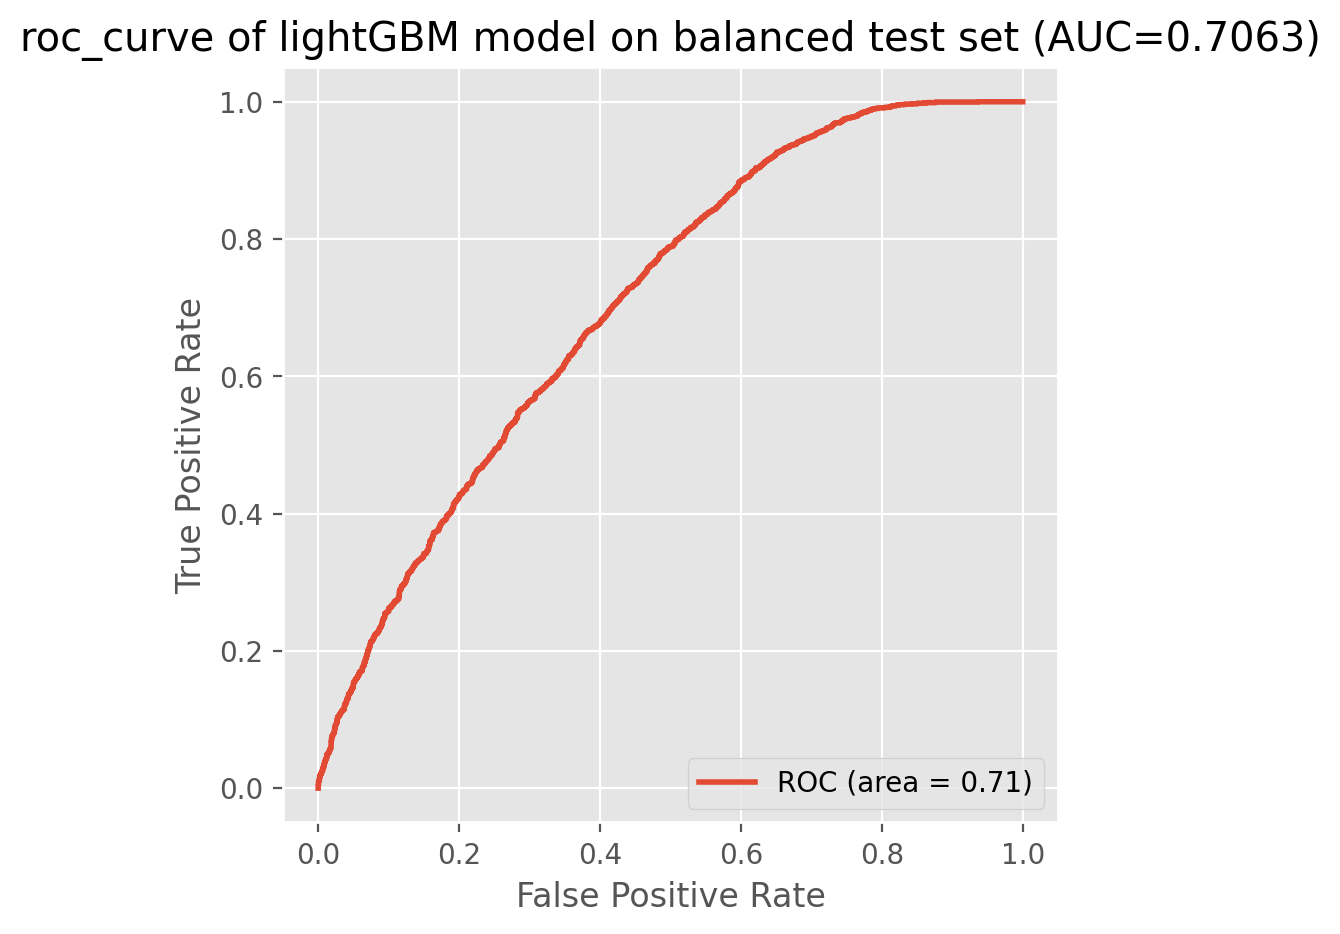

In [239]:
pred_lgb = prediction6
# test y 已经定义过了
test = pd.merge(test_y,prediction6, on='user')

gbm_fpr,gbm_tpr,gbm_threasholds=roc_curve(test.iloc[:,1],test.iloc[:,2]) # 计算ROC的值,svm_threasholds为阈值

roc_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(5, 5))
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.title("roc_curve of %s(AUC=%.4f)" %('lightGBM model on balanced test set ',roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(gbm_fpr,gbm_tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.legend(loc="lower right")
# plt.savefig("baseline_roc.png")

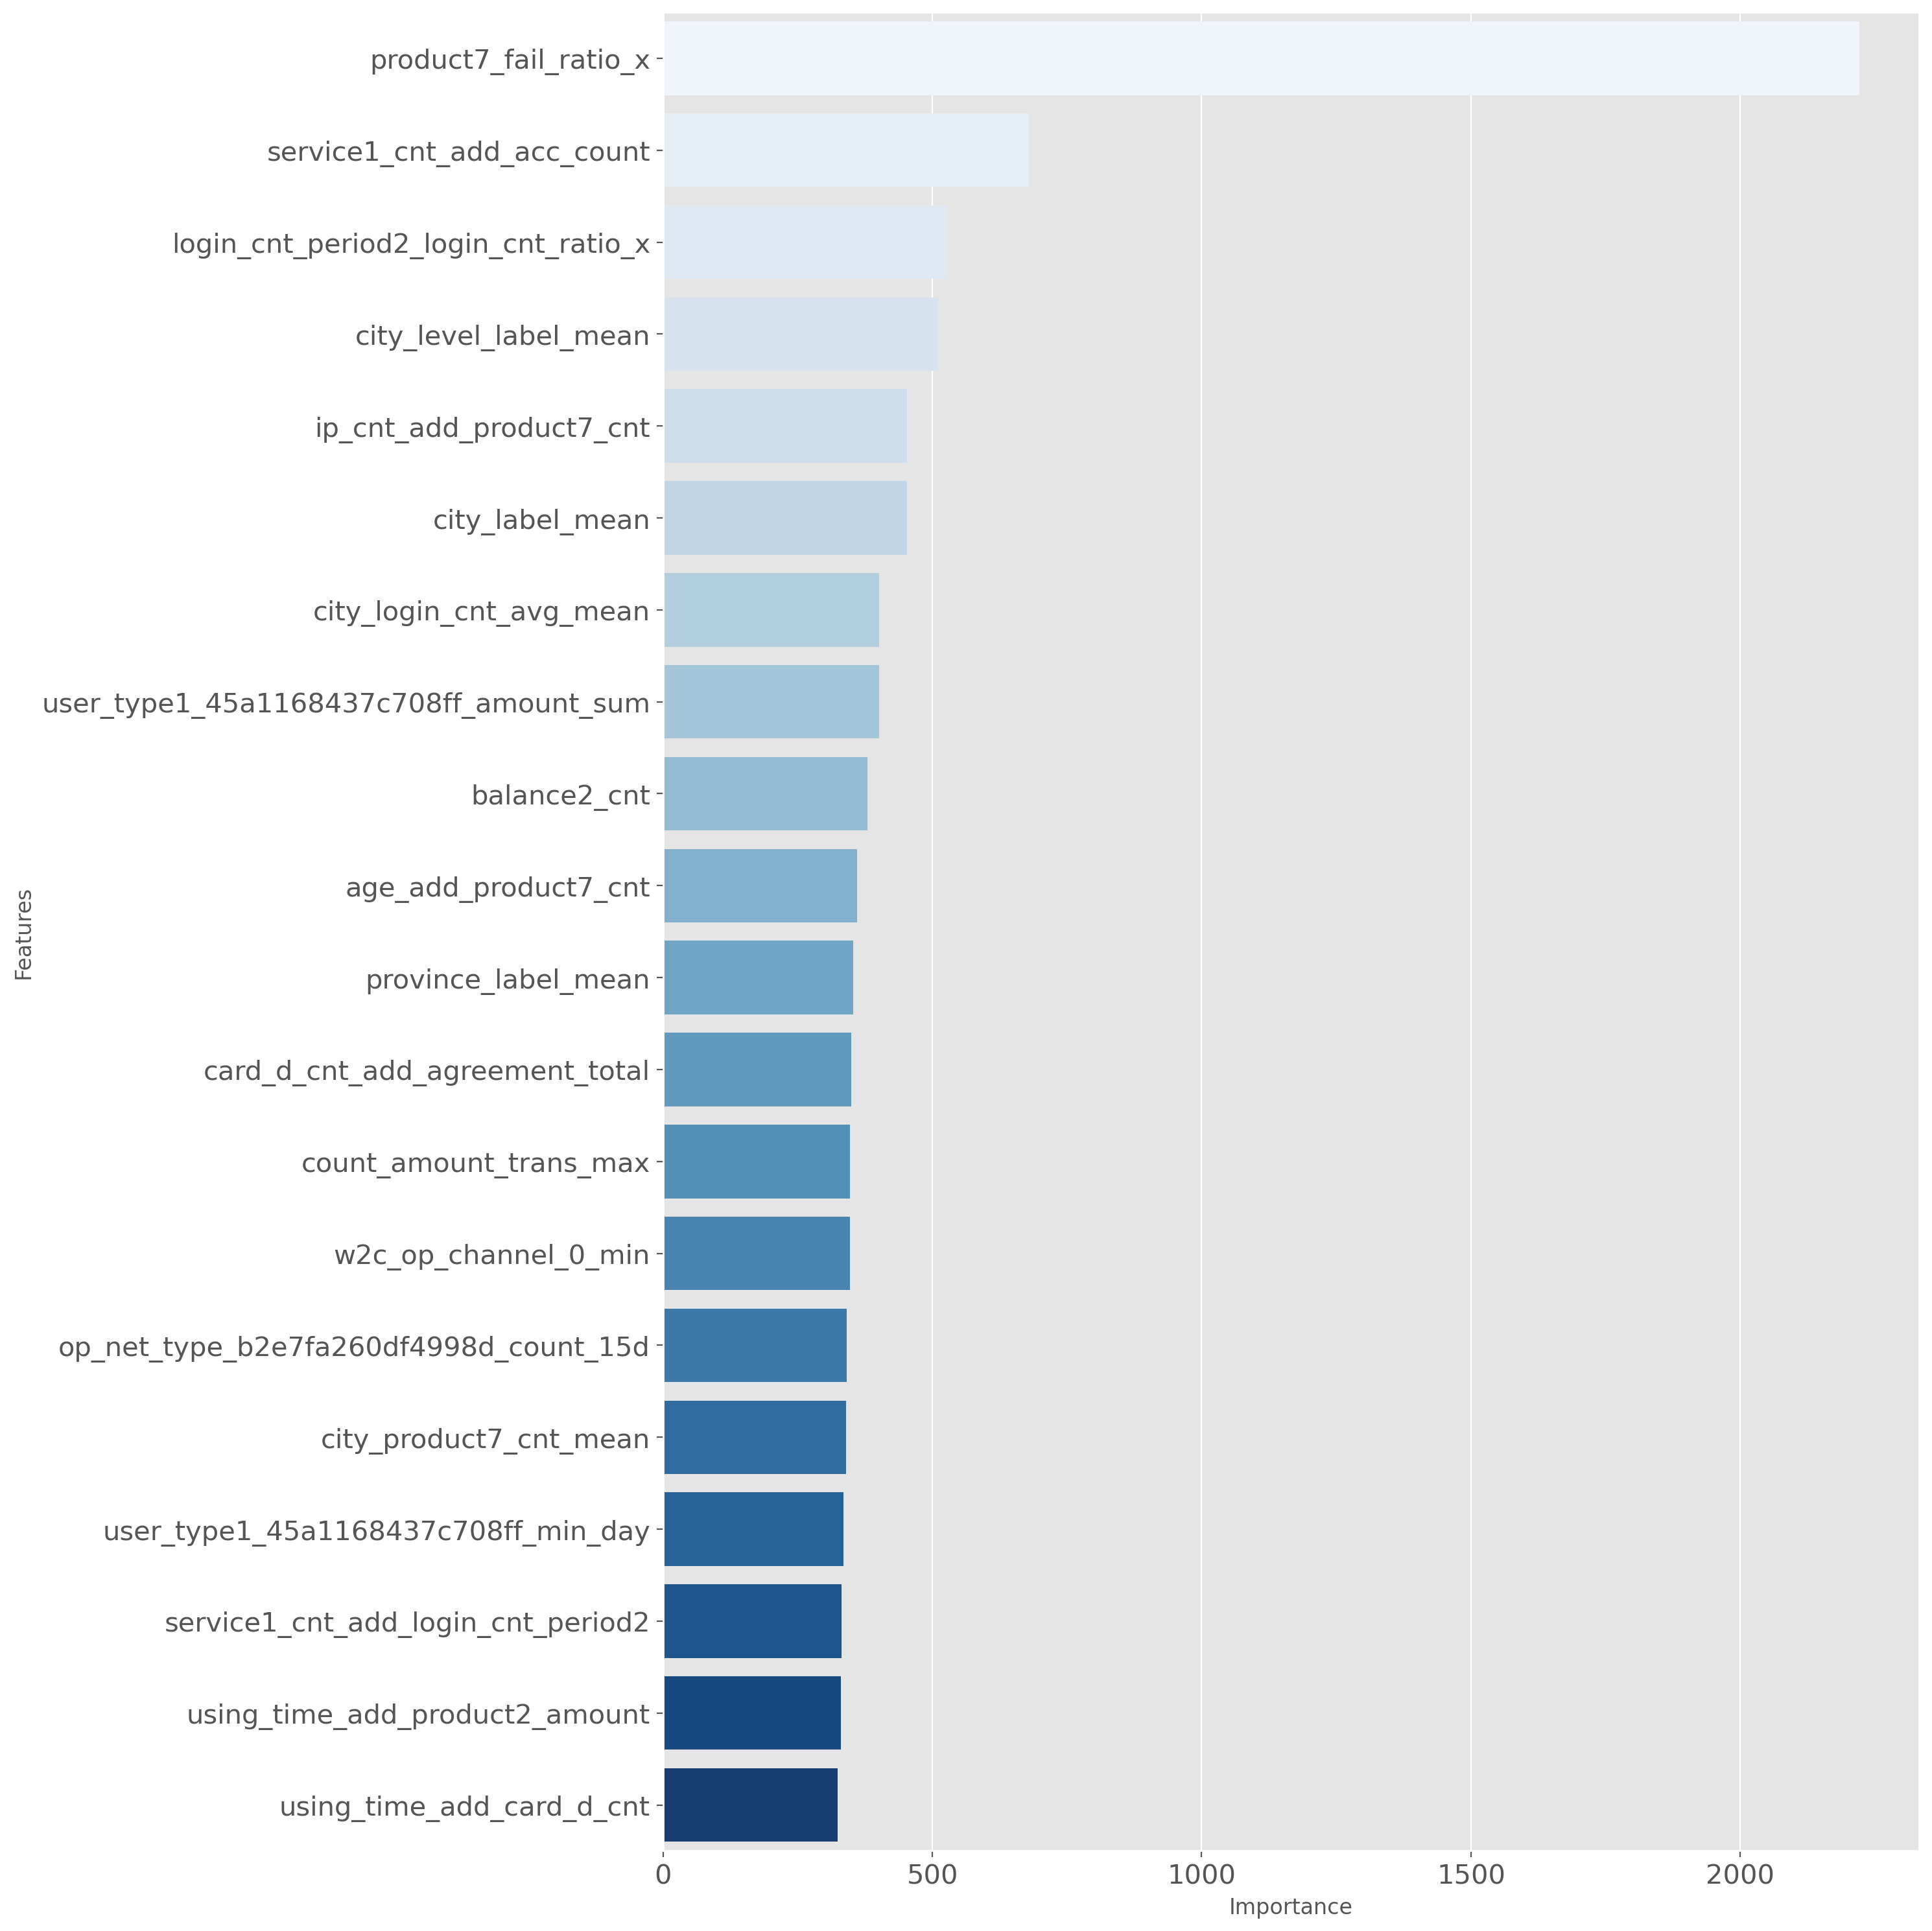

In [240]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 15))
sns.barplot(x="importance", y="column", data=df_importance_top20, palette='Blues' ) 
# plt.title('LightGBM Features (avg over folds)')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.xlabel('Importance')
plt.ylabel('Features')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances.png')

In [231]:
# 尝试使用合成数据在平衡样本上测试

In [241]:
df_train = gen_user(train_resampled_smotetomek)

In [242]:
ycol = 'label'
feature_names = list(filter(lambda x: x not in [ycol, 'user'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           num_leaves=25,
                           max_depth=14,
                           learning_rate=0.01,
                           n_estimators=10000,
                           subsample=0.56,
                           feature_fraction=0.59,
                           reg_alpha=10,
                           reg_lambda=13,
                           random_state=seed,
                           is_unbalance=True,
                           metric='auc')

df_oof = df_train[['user', ycol]].copy()
df_oof['prob'] = 0
prediction7 = df_test[['user']]
prediction7['prob'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(
        fold_id + 1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict_proba(X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof.loc[val_idx, 'prob'] = pred_val

    pred_test = lgb_model.predict_proba(df_test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction7['prob'] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()

<ipython-input-242-43886cb7471d>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_1 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.894698	valid's auc: 0.88772
[200]	train's auc: 0.908161	valid's auc: 0.899972
[300]	train's auc: 0.91444	valid's auc: 0.904866
[400]	train's auc: 0.919357	valid's auc: 0.907809
[500]	train's auc: 0.923553	valid's auc: 0.909993
[600]	train's auc: 0.927252	valid's auc: 0.911535
[700]	train's auc: 0.930581	valid's auc: 0.912606
[800]	train's auc: 0.933657	valid's auc: 0.913405
[900]	train's auc: 0.936553	valid's auc: 0.914198
[1000]	train's auc: 0.939289	valid's auc: 0.914778
[1100]	train's auc: 0.941892	valid's auc: 0.915228
[1200]	train's auc: 0.94434	valid's auc: 0.915507
[1300]	train's auc: 0.946665	valid's auc: 0.915798
[1400]	train's auc: 0.948859	valid's auc: 0.915987
[1500]	train's auc: 0.95097	valid's auc: 0.916128
[1600]	tra

<ipython-input-242-43886cb7471d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_2 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.894193	valid's auc: 0.888242
[200]	train's auc: 0.907439	valid's auc: 0.900389
[300]	train's auc: 0.914166	valid's auc: 0.905221
[400]	train's auc: 0.919321	valid's auc: 0.908473
[500]	train's auc: 0.923604	valid's auc: 0.910641
[600]	train's auc: 0.927332	valid's auc: 0.912133
[700]	train's auc: 0.930689	valid's auc: 0.91299
[800]	train's auc: 0.933871	valid's auc: 0.913756
[900]	train's auc: 0.936846	valid's auc: 0.914295
[1000]	train's auc: 0.939617	valid's auc: 0.914727
[1100]	train's auc: 0.942231	valid's auc: 0.914969
[1200]	train's auc: 0.944678	valid's auc: 0.915215
[1300]	train's auc: 0.947031	valid's auc: 0.915383
[1400]	train's auc: 0.949193	valid's auc: 0.915615
[1500]	train's auc: 0.951324	valid's auc: 0.915731
[1600]	

<ipython-input-242-43886cb7471d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_3 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.894514	valid's auc: 0.892172
[200]	train's auc: 0.907733	valid's auc: 0.903108
[300]	train's auc: 0.914102	valid's auc: 0.907218
[400]	train's auc: 0.919133	valid's auc: 0.909813
[500]	train's auc: 0.92338	valid's auc: 0.911661
[600]	train's auc: 0.927094	valid's auc: 0.913026
[700]	train's auc: 0.930315	valid's auc: 0.914168
[800]	train's auc: 0.933314	valid's auc: 0.915087
[900]	train's auc: 0.936249	valid's auc: 0.915788
[1000]	train's auc: 0.938945	valid's auc: 0.916418
[1100]	train's auc: 0.941526	valid's auc: 0.916891
[1200]	train's auc: 0.943971	valid's auc: 0.917302
[1300]	train's auc: 0.946281	valid's auc: 0.917616
[1400]	train's auc: 0.948478	valid's auc: 0.917891
[1500]	train's auc: 0.950571	valid's auc: 0.918117
[1600]	

<ipython-input-242-43886cb7471d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_4 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.894008	valid's auc: 0.88832
[200]	train's auc: 0.907125	valid's auc: 0.901269
[300]	train's auc: 0.913919	valid's auc: 0.906969
[400]	train's auc: 0.919075	valid's auc: 0.910012
[500]	train's auc: 0.923343	valid's auc: 0.911933
[600]	train's auc: 0.927086	valid's auc: 0.913116
[700]	train's auc: 0.930443	valid's auc: 0.91406
[800]	train's auc: 0.933425	valid's auc: 0.914605
[900]	train's auc: 0.936314	valid's auc: 0.915109
[1000]	train's auc: 0.939062	valid's auc: 0.915466
[1100]	train's auc: 0.941692	valid's auc: 0.915769
[1200]	train's auc: 0.944156	valid's auc: 0.915988
[1300]	train's auc: 0.946522	valid's auc: 0.916095
[1400]	train's auc: 0.948787	valid's auc: 0.916274
[1500]	train's auc: 0.950898	valid's auc: 0.916453
[1600]	t

<ipython-input-242-43886cb7471d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Fold_5 Training ================================

[LightGBM] [Warning] feature_fraction is set=0.59, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.59
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.894609	valid's auc: 0.893633
[200]	train's auc: 0.907494	valid's auc: 0.90327
[300]	train's auc: 0.913958	valid's auc: 0.907186
[400]	train's auc: 0.918932	valid's auc: 0.909722
[500]	train's auc: 0.923262	valid's auc: 0.911707
[600]	train's auc: 0.927025	valid's auc: 0.913135
[700]	train's auc: 0.93028	valid's auc: 0.914018
[800]	train's auc: 0.933323	valid's auc: 0.9148
[900]	train's auc: 0.936239	valid's auc: 0.915395
[1000]	train's auc: 0.939006	valid's auc: 0.915925
[1100]	train's auc: 0.941522	valid's auc: 0.916312
[1200]	train's auc: 0.943997	valid's auc: 0.916709
[1300]	train's auc: 0.946276	valid's auc: 0.91695
[1400]	train's auc: 0.94856	valid's auc: 0.917203
[1500]	train's auc: 0.95069	valid's auc: 0.917344
[1600]	train'

<ipython-input-242-43886cb7471d>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



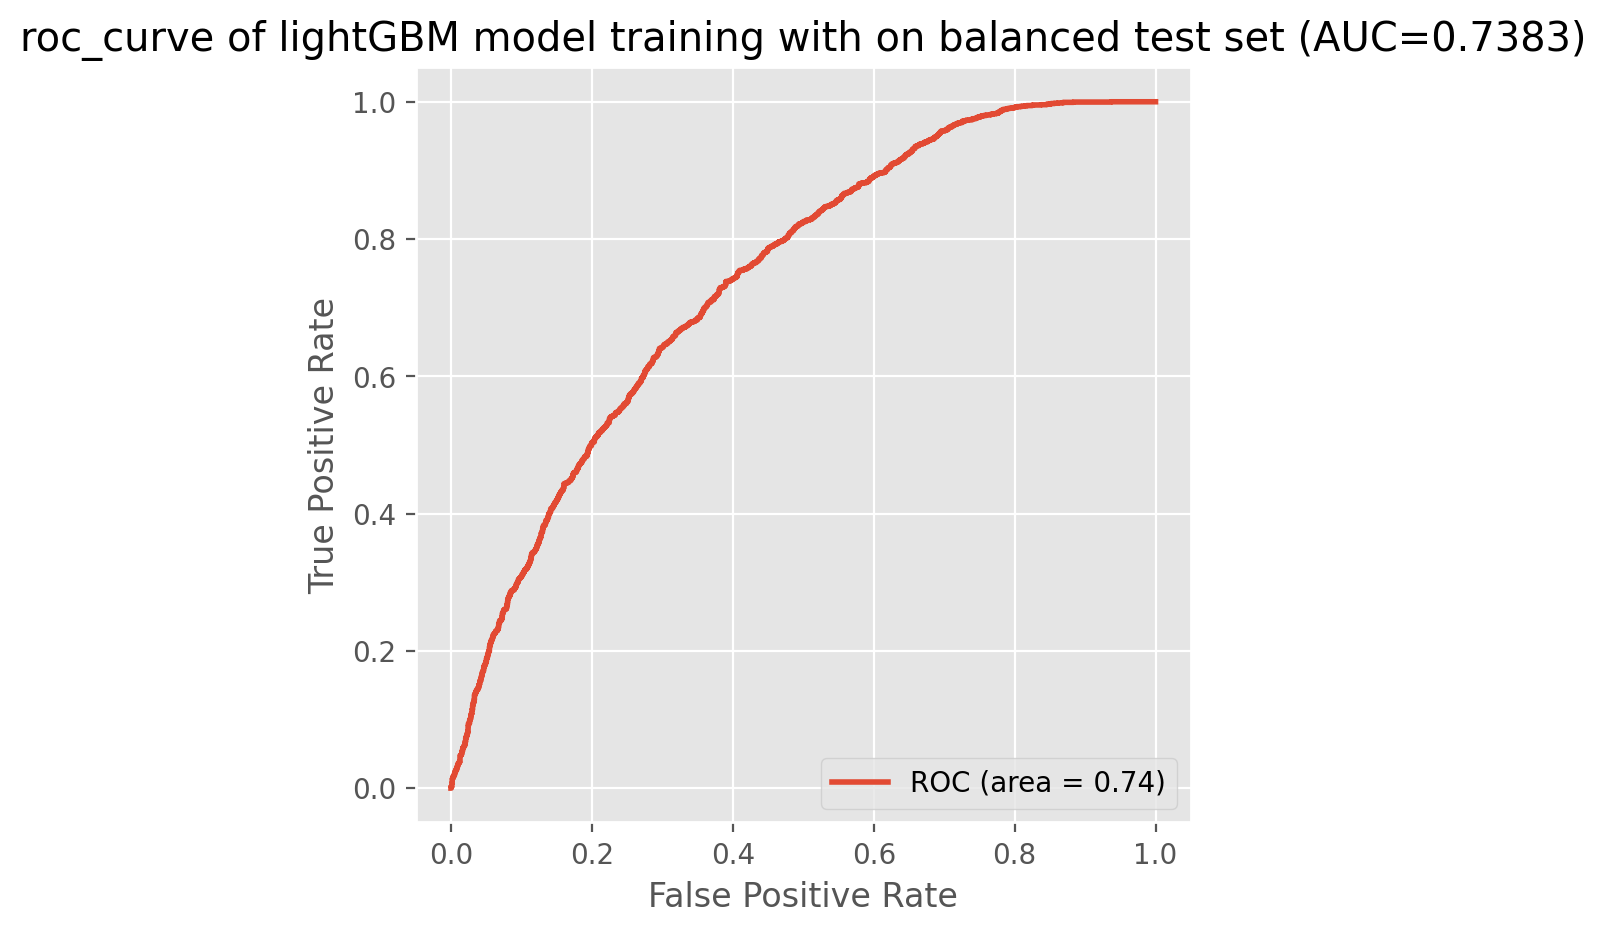

In [243]:
pred_lgb = prediction7
# test y 已经定义过了
test = pd.merge(test_y,prediction7, on='user')

gbm_fpr,gbm_tpr,gbm_threasholds=roc_curve(test.iloc[:,1],test.iloc[:,2]) # 计算ROC的值,svm_threasholds为阈值

roc_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(5, 5))
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.title("roc_curve of %s(AUC=%.4f)" %('lightGBM model training with on balanced test set ',roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(gbm_fpr,gbm_tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.legend(loc="lower right")
# plt.savefig("baseline_roc.png")

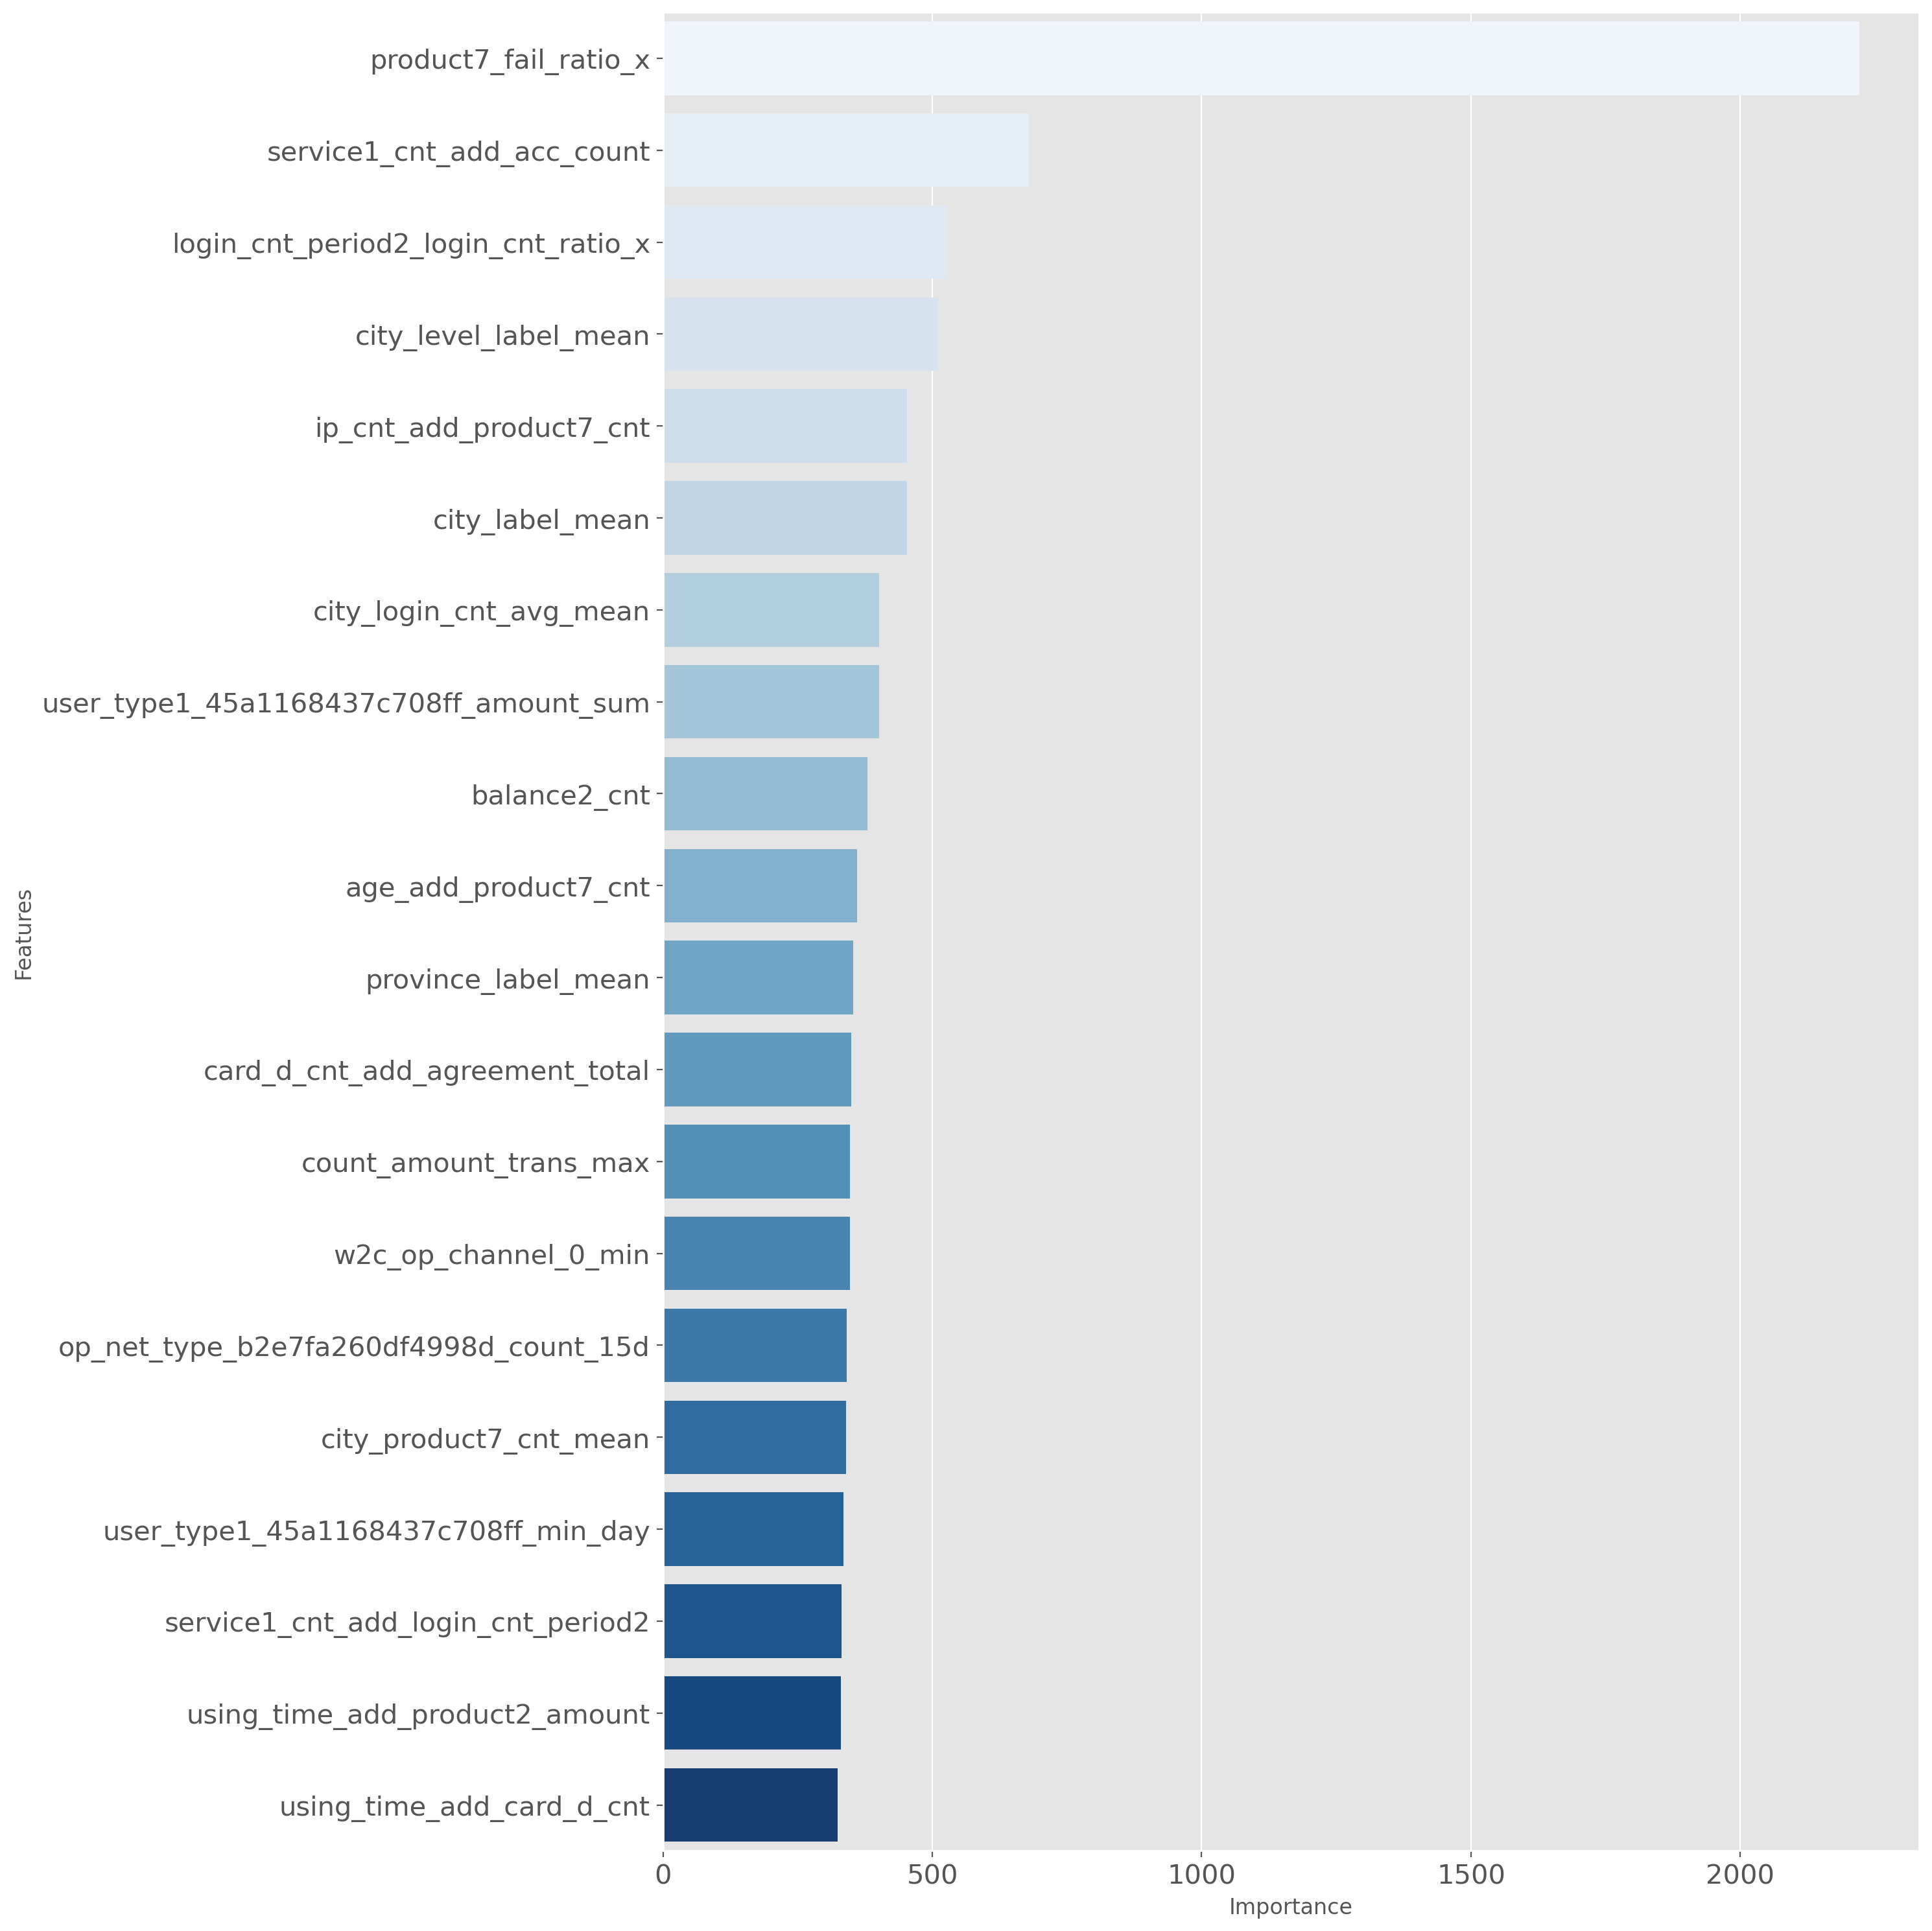

In [244]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg('mean').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 15))
sns.barplot(x="importance", y="column", data=df_importance_top20, palette='Blues' ) 
# plt.title('LightGBM Features (avg over folds)')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.xlabel('Importance')
plt.ylabel('Features')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances.png')